### 1. Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Importing data set, creating data frame and displaying first five row of data frame

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### 3. Data Frame Explore

#### a). Data frame shape

In [3]:
df.shape

(1000, 40)

##### Outcome : There are total 1000 rows and 40 columns in the data frame.

#### b). Data Frame Info 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

##### Outcome : 
* 21 out of 40 columns are of object type. The columns are :'policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',   'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type',    'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location',    'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'.
* 17 out of 40 columns are of int type.The columns are : 'months_as_customer', 'age', 'policy_number', 'policy_deductable',     'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',    'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'.
* 2 out of 40 columns are of float type.The columns are : 'policy_annual_premium', '_c39'.
* Only column '_C39' contain null value.

#### c). Checking null values

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

##### Outcome : '_c39' contain all null value so i will drop it in later part. 

#### d). Checking the uniqueness of values in each column

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

##### Outcome : 
* Above are the unique value in each columns.
* It is also observed 'policy_number', 'incident_location' have all values which is unique. So i can drop it.
* It is also observed 'insured_zip' has almost all values which is unique. So i can drop it.

#### e). Checking the values type count of each column

In [7]:
for i in df.columns:
    print('The value count for '+i+' is :\n',df[i].value_counts())
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')

The value count for months_as_customer is :
 194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for age is :
 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for policy_number is :
 296960    1
206213    1
853360    1
521585    1
290162    1
         ..
276804  

##### Outcome :
* 'umbrella_limit' contains negative value in one row  so i have to drop it.
* 'property_damage', 'police_report_available', 'collision_type' contains '?' need to deal with it. 

##### Decision :
* '_c39' contain all null value so drop it.
* 'policy_number' and 'incident_location' have all values which is unique so drop it.
* 'insured_zip' has almost all values which is unique so drop it.
* Extract day,month & year from 'policy_bind_date' and 'incident_date'.
* 'umbrella_limit' contains negative value in one row so drop that row.
* 'property_damage', 'police_report_available', 'collision_type' contains '?' so replace it with 'No Info'.

#### f). Correlation matrix to see the coffecient of multicolinearity

In [8]:
df.drop(columns=['_c39','policy_number','incident_location','insured_zip'],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
df_corr = df.corr().abs()
df_corr

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,0.007075,0.007368,0.087161,0.022102,0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_deductable,0.026807,0.029188,1.000000,0.003245,0.010870,0.035212,0.023544,0.060935,0.051214,0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.003245,1.000000,0.006247,0.013738,0.023547,0.001578,0.045991,0.026780,0.002332,0.009094,0.017633,0.011654,0.020246,0.049226
umbrella_limit,0.015498,0.018126,0.010870,0.006247,1.000000,0.047268,0.024056,0.023257,0.021270,0.022743,0.006738,0.040344,0.045412,0.023790,0.038584,0.009893
capital-gains,0.006399,0.007075,0.035212,0.013738,0.047268,1.000000,0.046904,0.016406,0.061643,0.055829,0.017651,0.015980,0.025934,0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,0.023544,0.023547,0.024056,0.046904,1.000000,0.025054,0.014895,0.024418,0.041330,0.036060,0.046060,0.022863,0.032665,0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,0.001578,0.023257,0.016406,0.025054,1.000000,0.120794,0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,0.045991,0.021270,0.061643,0.014895,0.120794,1.000000,0.014030,0.014669,0.274278,0.224650,0.219084,0.269393,0.034554
bodily_injuries,0.010162,0.015679,0.022765,0.026780,0.022743,0.055829,0.024418,0.034563,0.014030,1.000000,0.005606,0.047093,0.047319,0.039749,0.043449,0.020527


<AxesSubplot:>

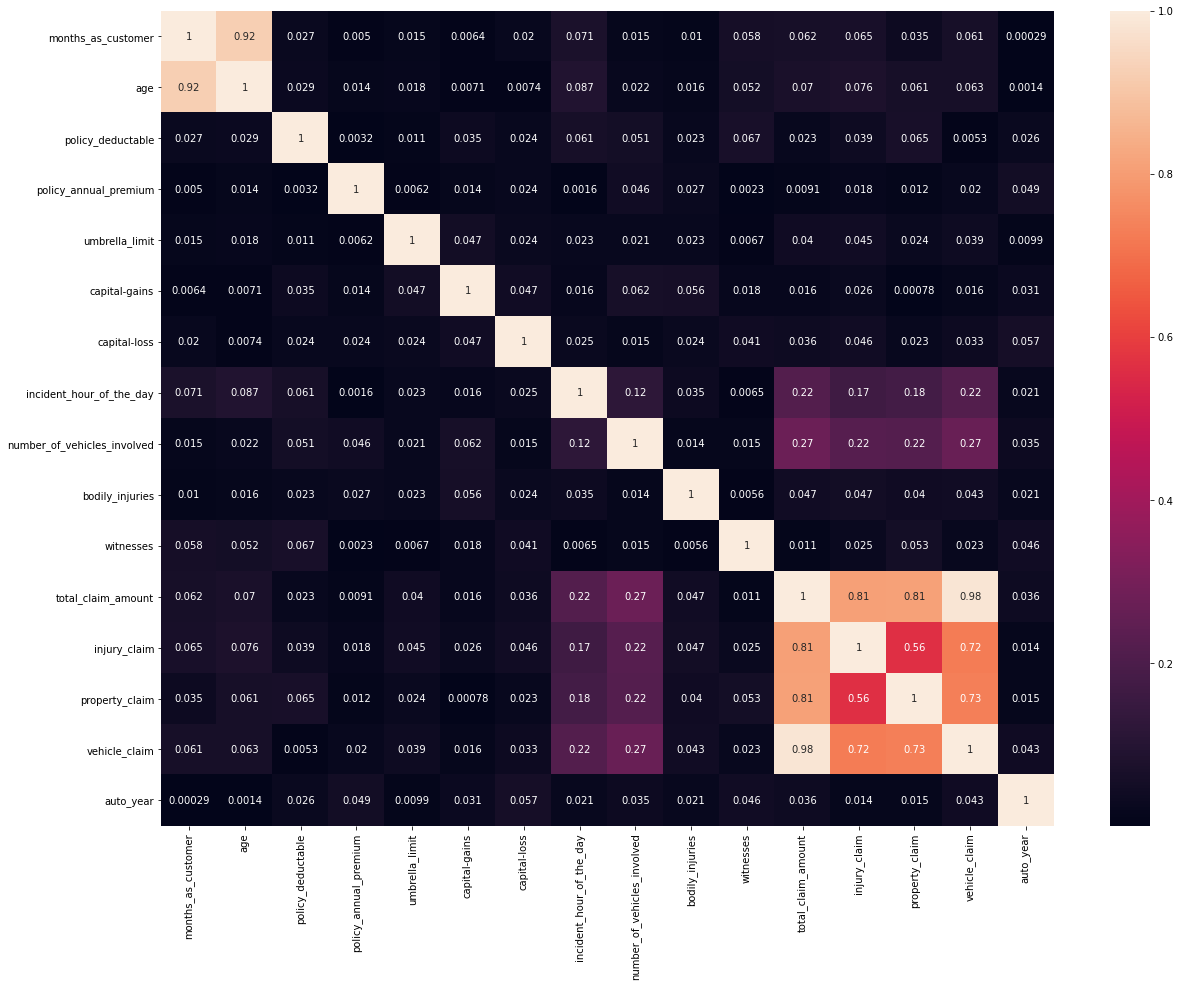

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True)

##### Outcome : Features total_claim_amount, vechile_claim, property_claim, and injury_claim are highly correlated to each other. will deal itin later part.

### 4. Data Preprocessing

#### a). Extracting Day,Month,Year from 'policy_bind_date' and 'incident_date'

In [11]:
import datetime as dt

In [12]:
# Converting as date type
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [13]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                     

In [14]:
# Extracting Day, Month and Year from 'policy_bind_date'

# Extract Day
df['policy_bind_Date'] = pd.to_datetime(df['policy_bind_date'],format='%d-%m-%y').dt.day

# Extract Month
df['policy_bind_Month'] = pd.to_datetime(df['policy_bind_date'],format='%d-%m-%y').dt.month

# Extract Year
df['policy_bind_Year'] = pd.to_datetime(df['policy_bind_date'],format='%d-%m-%y').dt.year

In [15]:
# Extracting Day, Month and Year from 'incident_date'

# Extract Day
df['incident_Date'] = pd.to_datetime(df['incident_date'],format='%d-%m-%y').dt.day

# Extract Month
df['incident_Month'] = pd.to_datetime(df['incident_date'],format='%d-%m-%y').dt.month

# Extract Year
df['incident_Year'] = pd.to_datetime(df['incident_date'],format='%d-%m-%y').dt.year

In [16]:
# Dropping 'policy_bind_date' and 'incident_date'
df.drop(columns=['policy_bind_date','incident_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,Volkswagen,Passat,2015,N,1,5,2014,24,1,2015
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,Audi,A5,1998,N,18,11,2011,26,2,2015


#### b). Drop that row which contain negative value in 'umbrella_limit'

In [17]:
df.loc[df['umbrella_limit']==-1000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
290,284,42,OH,100/300,500,1338.54,-1000000,MALE,Associate,machine-op-inspct,...,Chevrolet,Malibu,1996,N,5,4,1995,29,1,2015


In [18]:
df.drop(df.loc[df['umbrella_limit']==-1000000].index,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,Volkswagen,Passat,2015,N,1,5,2014,24,1,2015
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,Audi,A5,1998,N,18,11,2011,26,2,2015


#### c). Dealing with '?' that contains in 'property_damage', 'police_report_available' , 'collision_type'  

In [19]:
df = df.replace('?','No Info')

In [20]:
for i in df.columns:
    print('The value count for '+i+' is :\n',df[i].value_counts())
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')

The value count for months_as_customer is :
 194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for age is :
 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    31
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The value count for policy_state is :
 OH    351
IL    338
IN    310
Name: policy_state, dtype: int64
------------------

#### d). Descriptive Statical Data

In [21]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.0
mean,203.873874,38.944945,1136.636637,1256.323934,1.103103e+06,25151.251251,-26820.520521,11.642643,1.839840,0.992993,...,7432.292292,7389.839840,37898.368368,2005.112112,15.458458,6.561562,2001.610611,13.068068,3.409409,2015.0
std,115.142928,9.144354,611.839681,244.275843,2.297594e+06,27874.792269,28105.366259,6.954722,1.019044,0.819936,...,4883.266266,4817.316312,18870.924206,6.011966,8.848424,3.392489,7.361107,10.436245,3.277046,0.0
min,0.000000,19.000000,500.000000,433.330000,0.000000e+00,0.000000,-111100.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0
25%,115.500000,32.000000,500.000000,1089.185000,0.000000e+00,0.000000,-51500.000000,6.000000,1.000000,0.000000,...,4290.000000,4440.000000,30275.000000,2000.000000,8.000000,4.000000,1995.000000,2.000000,1.000000,2015.0
50%,199.000000,38.000000,1000.000000,1257.040000,0.000000e+00,0.000000,-24100.000000,12.000000,1.000000,1.000000,...,6770.000000,6750.000000,42080.000000,2005.000000,16.000000,7.000000,2002.000000,15.000000,2.000000,2015.0
75%,276.000000,44.000000,2000.000000,1415.710000,0.000000e+00,51050.000000,0.000000,17.000000,3.000000,2.000000,...,11310.000000,10870.000000,50775.000000,2010.000000,23.000000,9.000000,2008.000000,22.000000,5.000000,2015.0
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.000000,2.000000,...,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,12.000000,2015.0


##### Outcome :
* The difference between mean and 50 % shows there is skewness in data frame.
* The hudge difference between 75 % and max shows there is outlier's in data frame. 

### 5. Data visualization of individual column

#### a). Data visualization of continous column

In [22]:
df1 = df.select_dtypes(exclude='object')
df1

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,6510,13020,52080,2004,17,10,2014,25,1,2015
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,780,780,3510,2007,27,6,2006,21,1,2015
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,7700,3850,23100,2007,9,6,2000,22,2,2015
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,6340,6340,50720,2014,25,5,1990,1,10,2015
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1300,650,4550,2009,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,17440,8720,61040,2006,16,7,1991,22,2,2015
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,18080,18080,72320,2015,1,5,2014,24,1,2015
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,7500,7500,52500,1996,17,2,2003,23,1,2015
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,5220,5220,36540,1998,18,11,2011,26,2,2015


#### b). Data visualization using dist plot

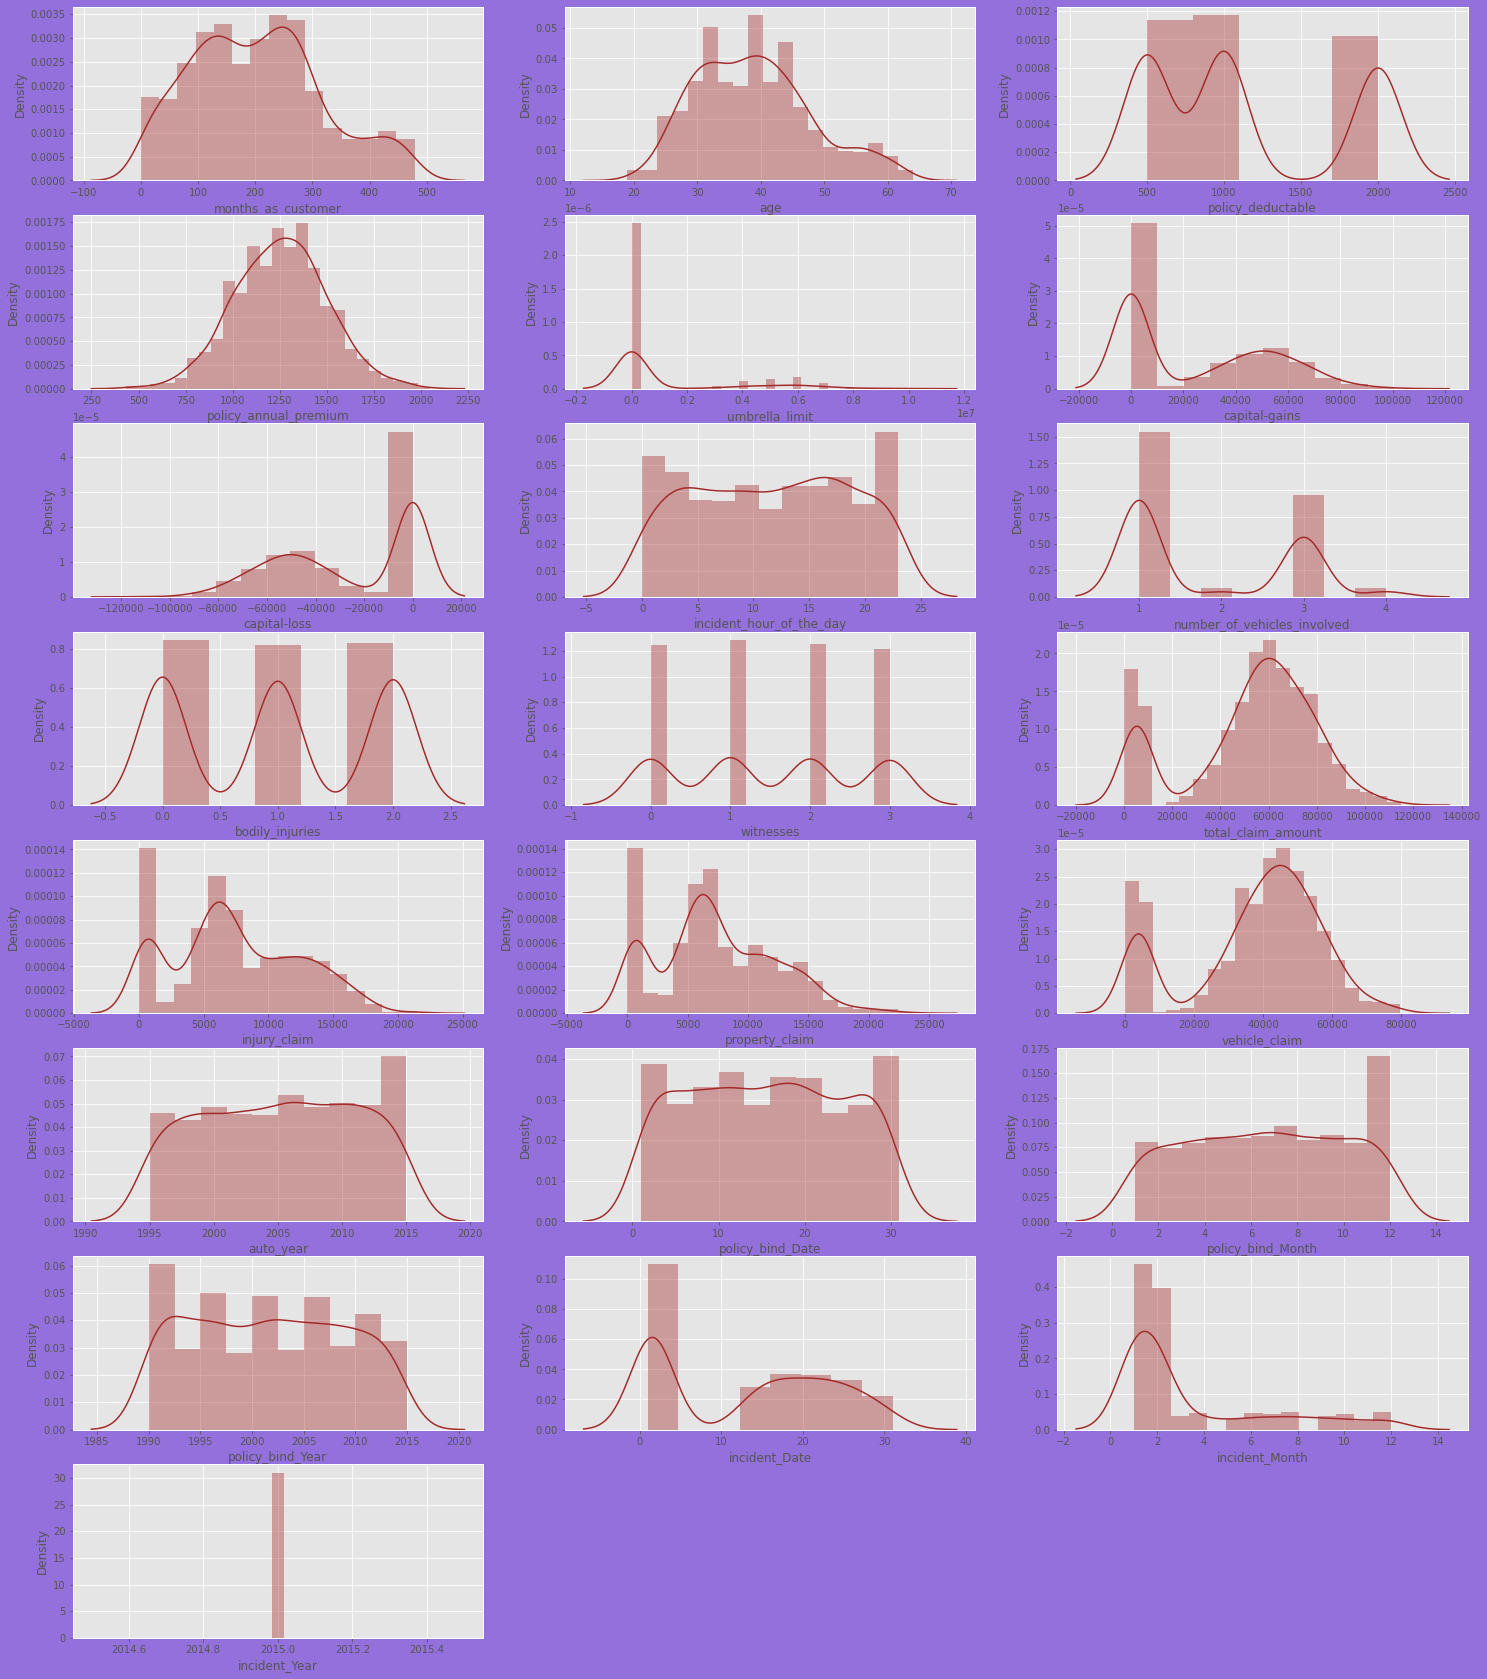

In [23]:
plt.figure(figsize=(25,30),facecolor='MediumPurple')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=22:
        ax = plt.subplot(8,3,plot_no)
        sns.distplot(df1[column],color = 'Brown')
        plt.xlabel(column,fontsize=12)
    plot_no+=1    
plt.show()    

#### c). Data visualization using hist plot

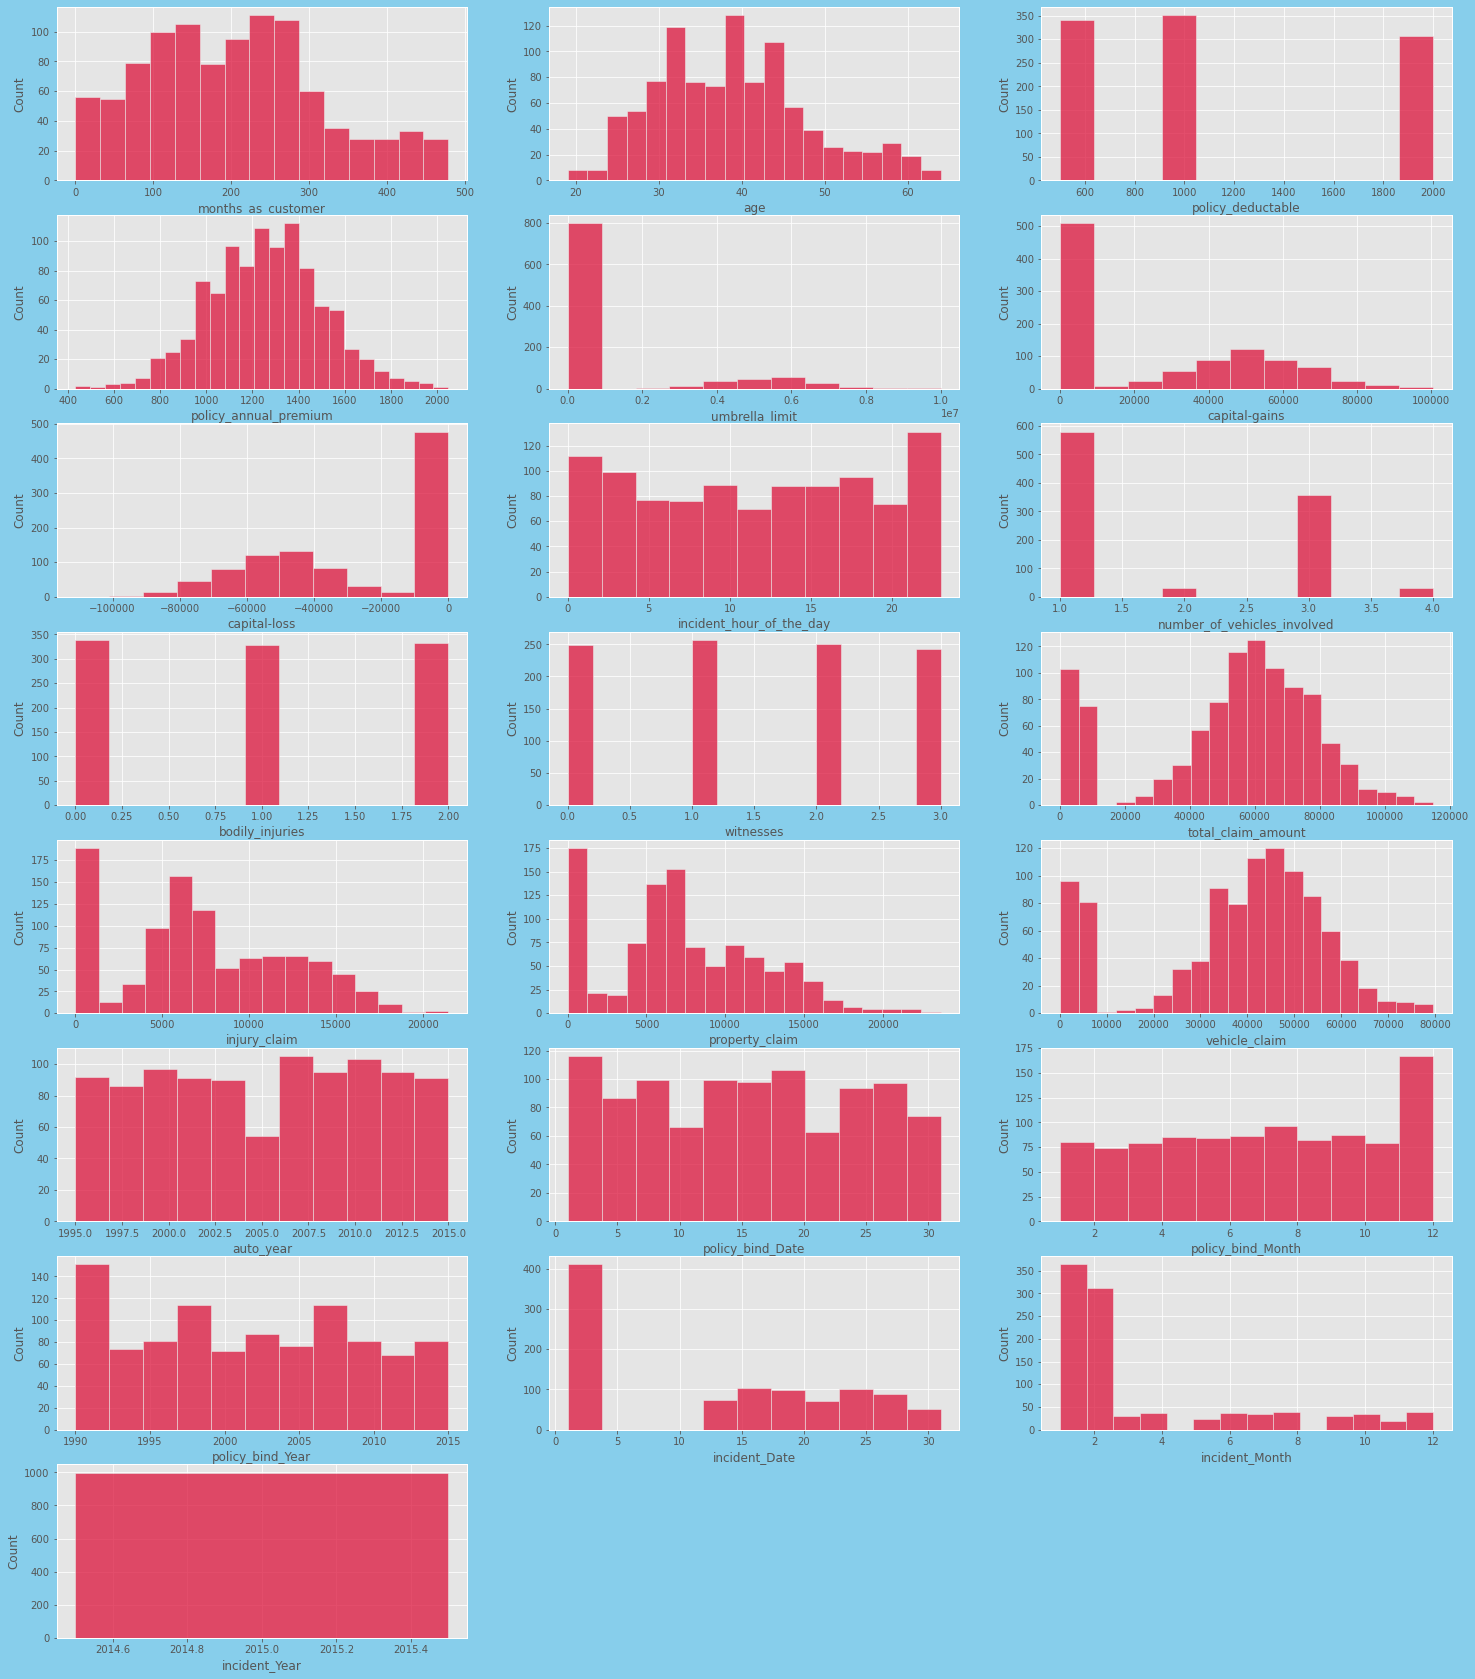

In [24]:
plt.figure(figsize=(25,30),facecolor='SkyBlue')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=22:
        ax = plt.subplot(8,3,plot_no)
        sns.histplot(df1[column],color = 'Crimson')
        plt.xlabel(column,fontsize=12)
    plot_no+=1    
plt.show()    

##### Outcome : From b and c some skewness is there in the data frame.

#### d). Data visualization using box plot

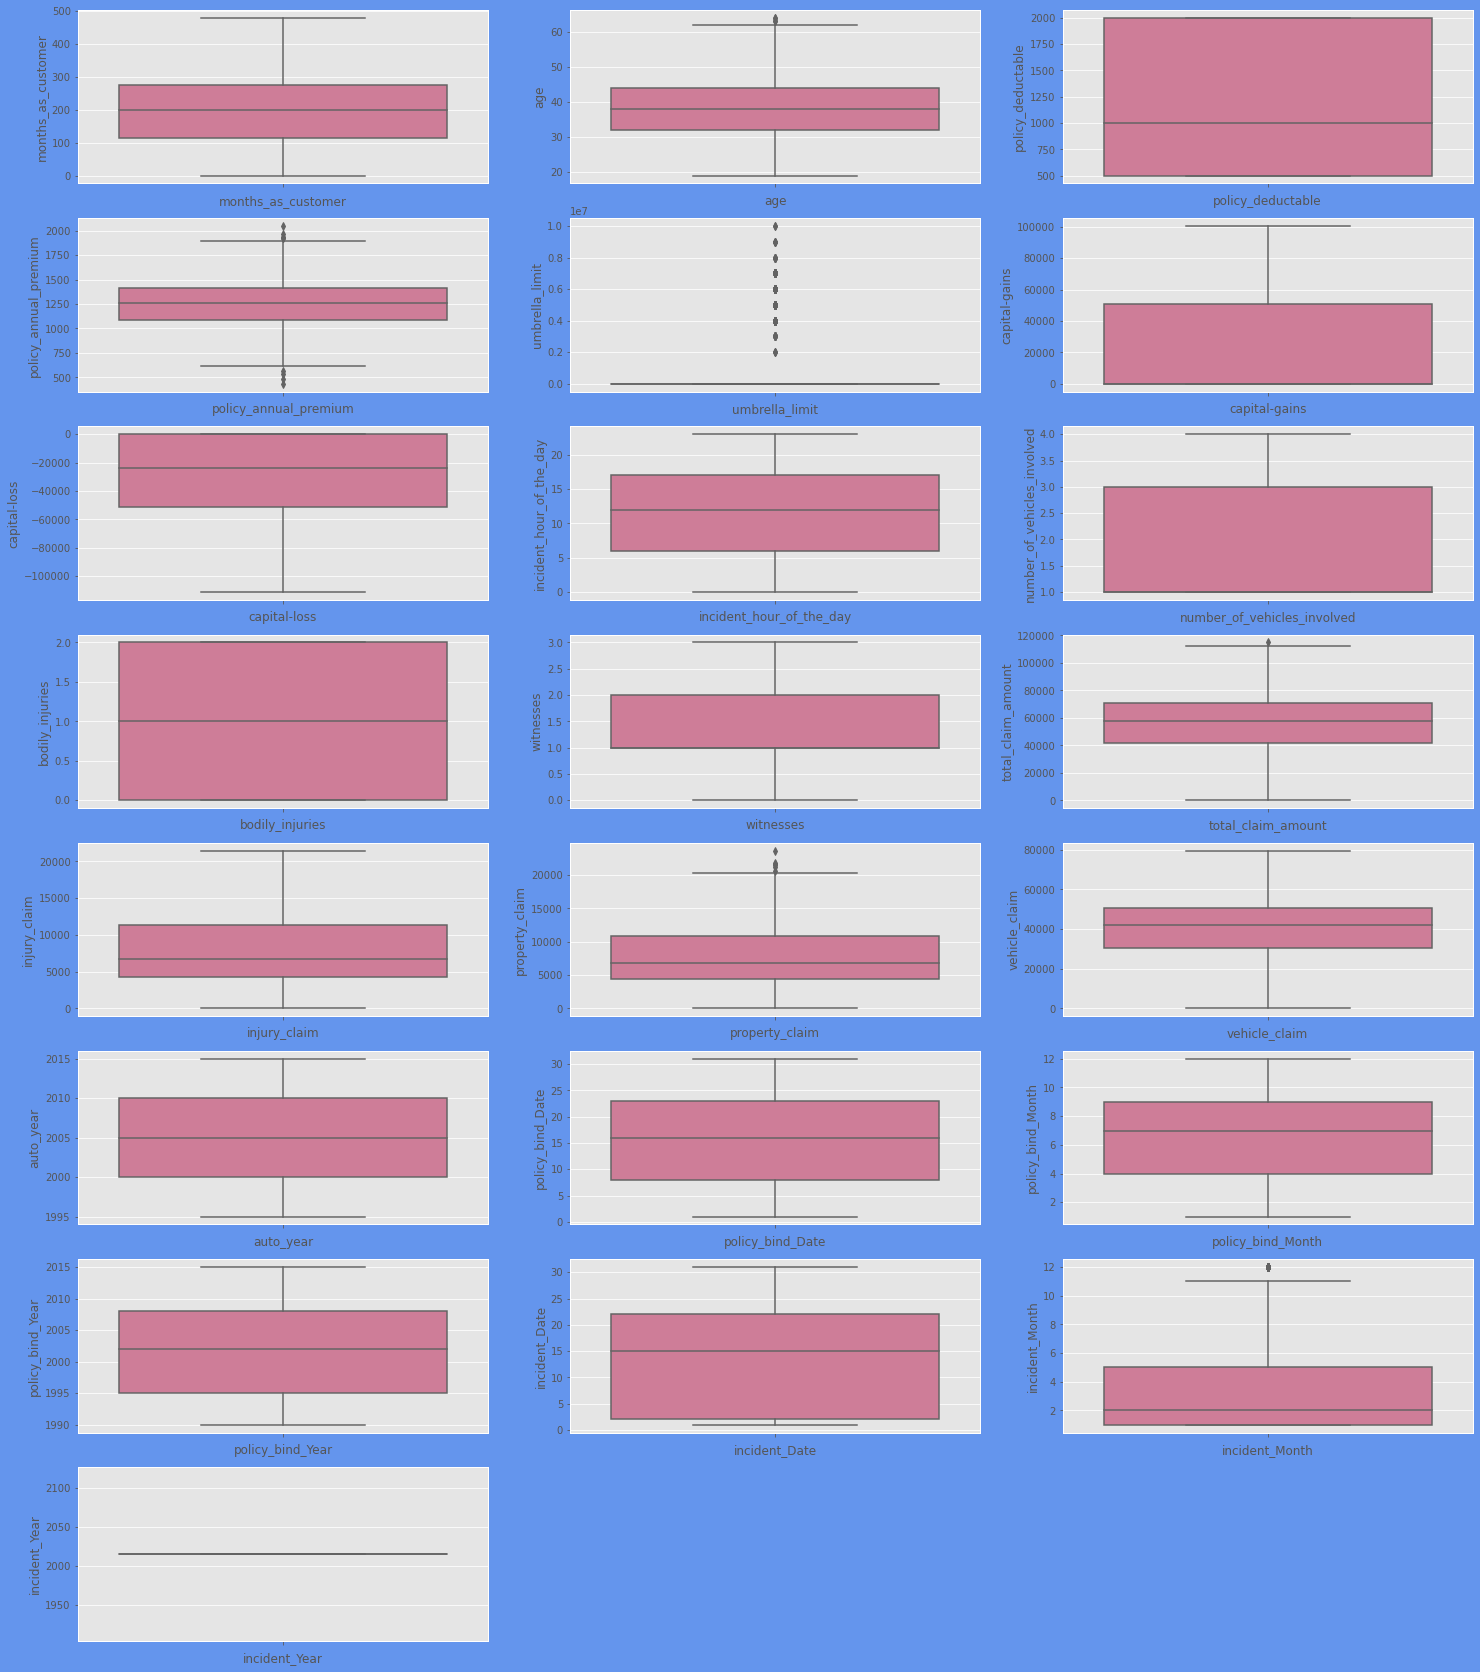

In [25]:
plt.figure(figsize=(25,30),facecolor='CornflowerBlue')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=22:
        ax = plt.subplot(8,3,plot_no)
        sns.boxplot(y=df1[column],color = 'PaleVioletRed')
        plt.xlabel(column,fontsize=12)
    plot_no+=1    
plt.show()    

##### Outcome : From above some outlier's also present.

#### e). Data visualization of categorical column

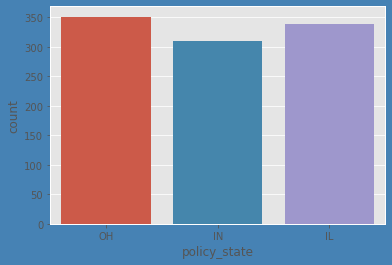

In [26]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('policy_state',data=df)
plt.show() 

##### Outcome : Mostly from CH policy_state, then IL then IN.

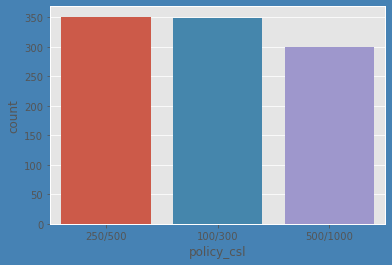

In [27]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('policy_csl',data=df)
plt.show() 

##### Outcome : Mostly from 250/500 policy_csl, then 100/300, then 500/1000.

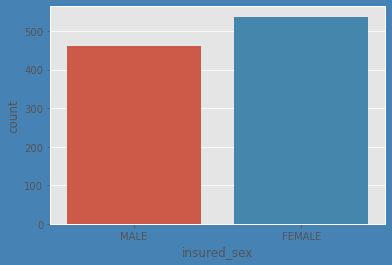

In [28]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('insured_sex',data=df)
plt.show() 

##### Outcome : Mostly are FEMALE.

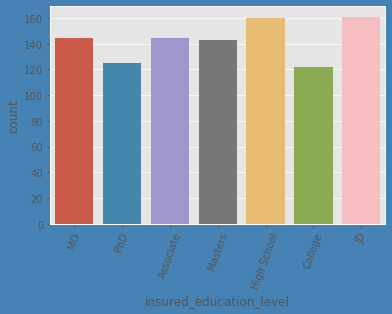

In [29]:
plt.figure(facecolor='SteelBlue')
plt.rcParams.update({'font.size':12})
plt.style.use('ggplot')
sns.countplot('insured_education_level',data=df)
plt.xticks(rotation=70);
plt.show() 

##### Outcome : Mostly from those insured_education_level are JD and High School. Then Associate and MD. Then Masters. Then PhD. Then College.

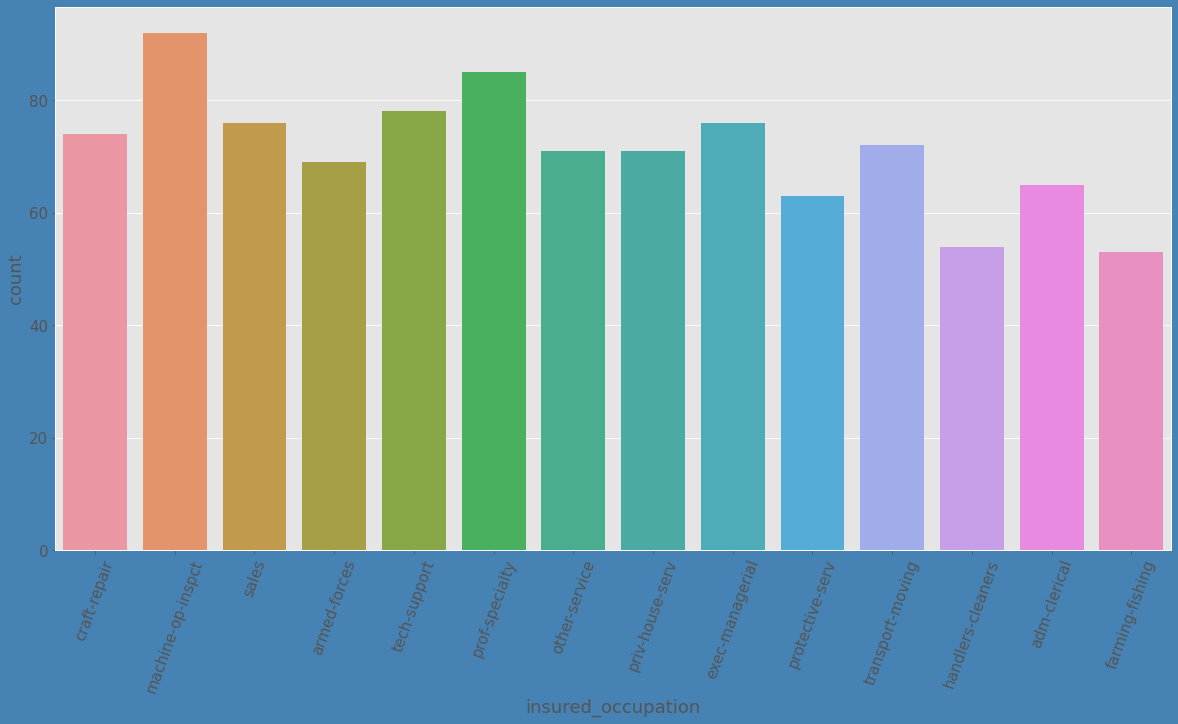

In [30]:
plt.figure(figsize=(20,10),facecolor='SteelBlue')
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
sns.countplot('insured_occupation',data=df)
plt.xticks(rotation=70);
plt.show() 

##### Outcome : Mostly from those who have insured_occupation as machine-op-inspct.

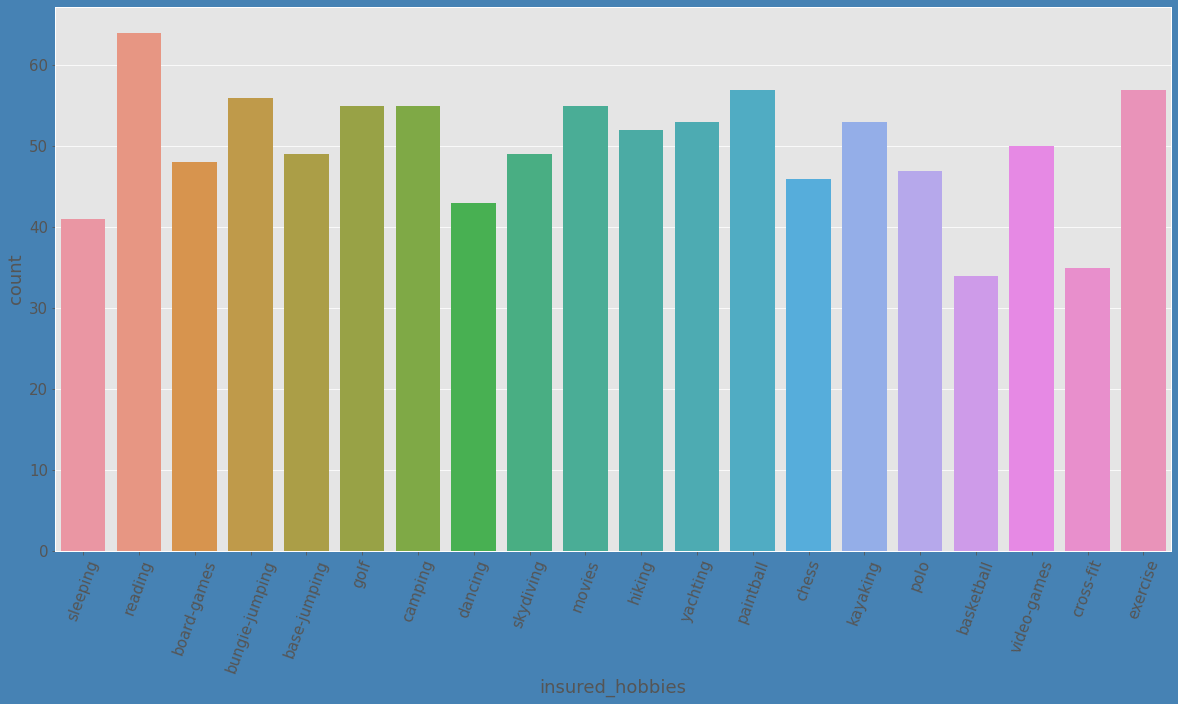

In [31]:
plt.figure(figsize=(20,10),facecolor='SteelBlue')
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
sns.countplot('insured_hobbies',data=df)
plt.xticks(rotation=70);
plt.show() 

##### Outcome : Mostly from those who have insured_hobbies as reading.

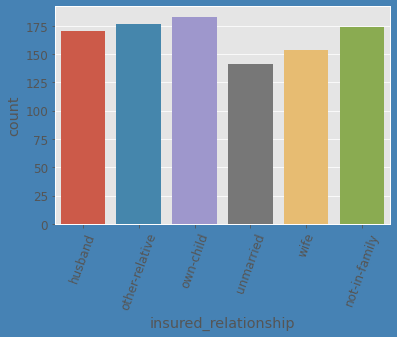

In [32]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
plt.rcParams.update({'font.size':12})
sns.countplot('insured_relationship',data=df)
plt.xticks(rotation=70);
plt.show() 

##### Outcome : Mostly from those who have insured_relationship as other-relative.

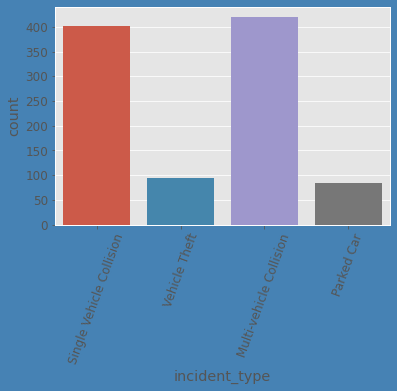

In [33]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
plt.rcParams.update({'font.size':12})
sns.countplot('incident_type',data=df)
plt.xticks(rotation=70);
plt.show() 

##### Outcome : Mostly from those who have incident_type as Single Vechicle Collision and Multi-Vechicle Collision.

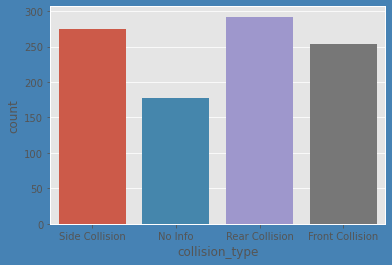

In [34]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('collision_type',data=df)
plt.show() 

##### Outcome : Mostly from those who have collision_type as Rear Collision. Then Side Collision and Front Collision.

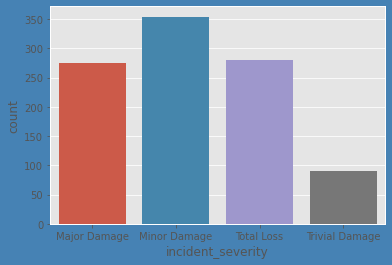

In [35]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('incident_severity',data=df)
plt.show() 

##### Outcome : Mostly from those who have incident_severity as Minor Damage.Then Major Damage and Total Lost

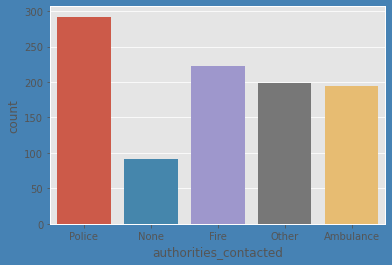

In [36]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('authorities_contacted',data=df)
plt.show() 

##### Outcome : Mostly from those who have authorities_contacted as Police.

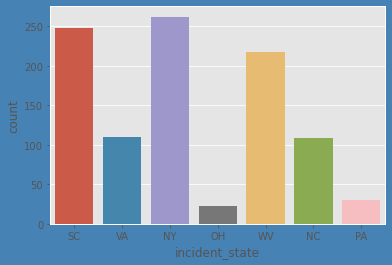

In [37]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('incident_state',data=df)
plt.show() 

##### Outcome : Mostly from those who have incident_state as NY.

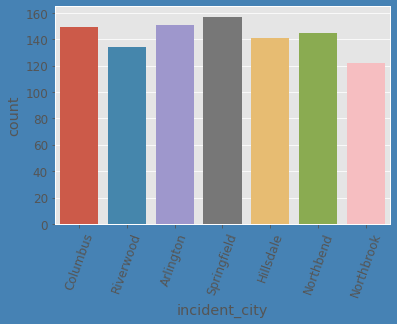

In [38]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
plt.rcParams.update({'font.size':12})
sns.countplot('incident_city',data=df)
plt.xticks(rotation=70);
plt.show() 

##### Outcome : Mostly from those who have incident_city as Springfield.

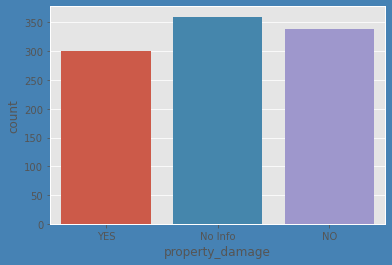

In [39]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('property_damage',data=df)
plt.show() 

##### Outcome : Mostly from those whose property_damage info is not available.

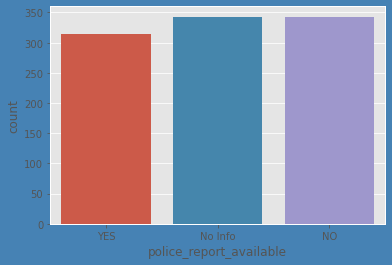

In [40]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('police_report_available',data=df)
plt.show() 

##### Outcome : Mostly from those whose police_report_available is not available.

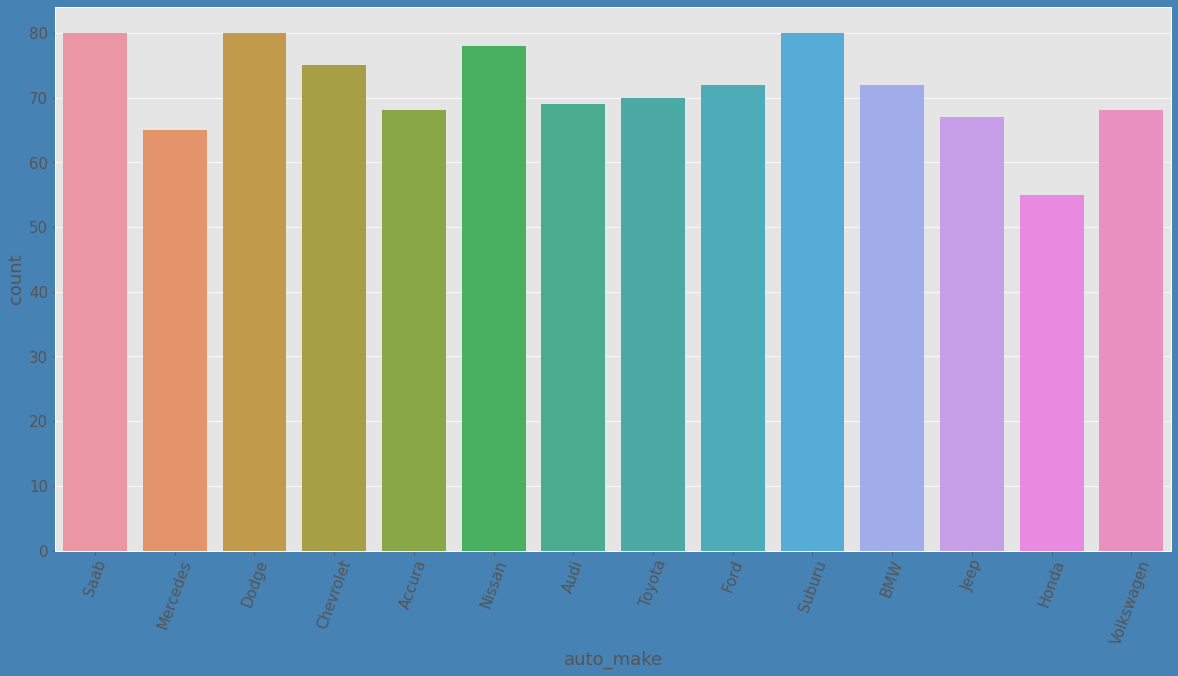

In [41]:
plt.figure(figsize=(20,10),facecolor='SteelBlue')
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
sns.countplot('auto_make',data=df)
plt.xticks(rotation=70);
plt.show() 

##### Outcome : Mostly from those who have auto_make as Saab,Dodge,Suburu .

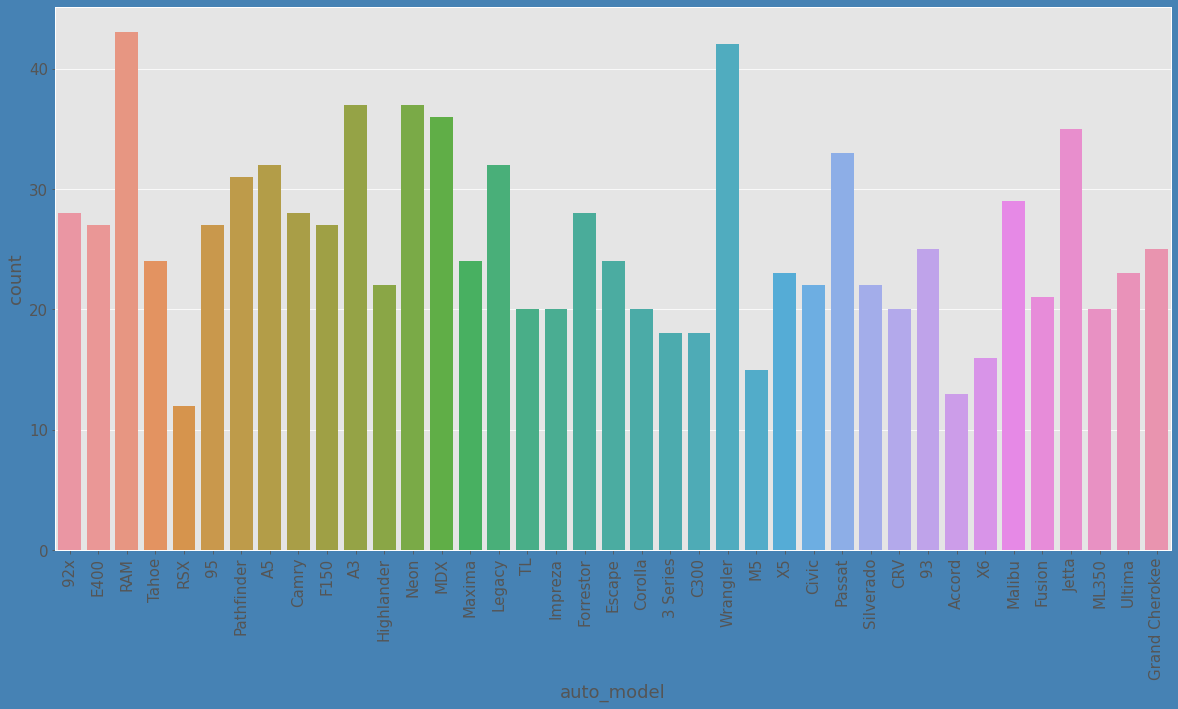

In [42]:
plt.figure(figsize=(20,10),facecolor='SteelBlue')
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
sns.countplot('auto_model',data=df)
plt.xticks(rotation=90);
plt.show() 

##### Outcome : Mostly from those who have auto_model as RAM and Wrangler .

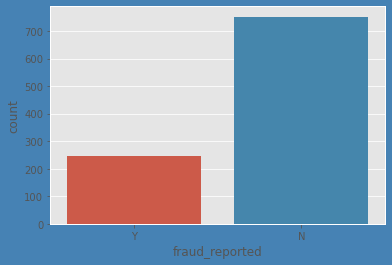

In [43]:
plt.figure(facecolor='SteelBlue')
plt.style.use('ggplot')
sns.countplot('fraud_reported',data=df)
plt.show() 

##### Outcome : Mostly cases are not fraud. As per problem statement it is target variable. It is looklike imbalance will deal it later part.

### 6. Data visualization with respect to target variable

Text(0.5, 1.0, 'Impact of policy_state on fraud_reported')

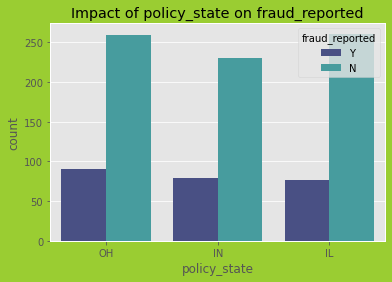

In [44]:
plt.figure(facecolor='YellowGreen')
sns.countplot('policy_state',hue='fraud_reported',data=df,palette='mako')
plt.title('Impact of policy_state on fraud_reported')

##### Outcome : Much fraud_reported in CH policy_state.

Text(0.5, 1.0, 'Impact of policy_csl on fraud_reported')

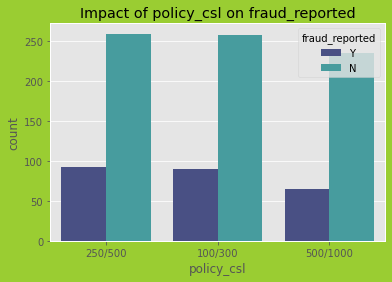

In [45]:
plt.figure(facecolor='YellowGreen')
sns.countplot('policy_csl',hue='fraud_reported',data=df,palette='mako')
plt.title('Impact of policy_csl on fraud_reported')

##### Outcome : Much fraud_reported in 250/500 policy_csl.

Text(0.5, 1.0, 'Impact of insured_sex on fraud_reported')

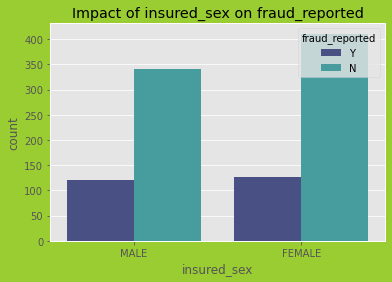

In [46]:
plt.figure(facecolor='YellowGreen')
sns.countplot('insured_sex',hue='fraud_reported',data=df,palette='mako')
plt.title('Impact of insured_sex on fraud_reported')

##### Outcome : Male has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of insured_education_level on fraud_reported')

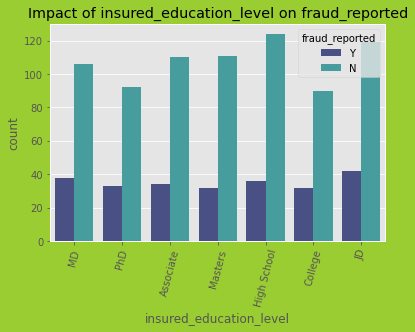

In [47]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':10})
sns.countplot('insured_education_level',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75)
plt.title('Impact of insured_education_level on fraud_reported')

##### Outcome : JD has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of insured_occupation on fraud_reported')

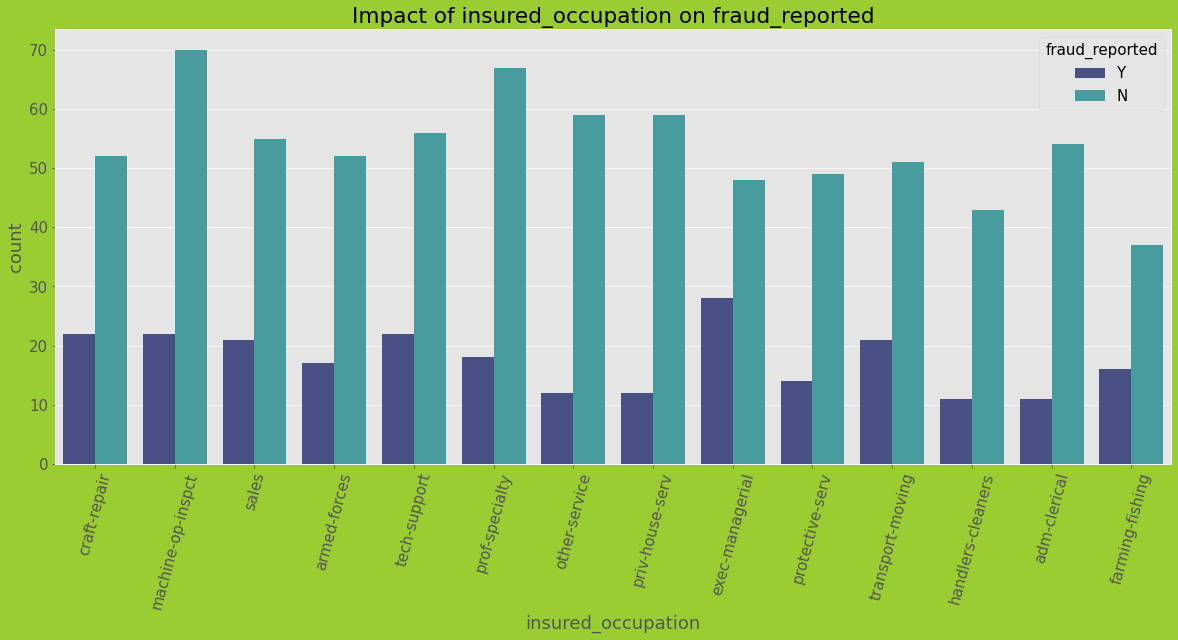

In [48]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot('insured_occupation',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75);
plt.title('Impact of insured_occupation on fraud_reported')

##### Outcome : exec-managerical has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of insured_hobbies on fraud_reported')

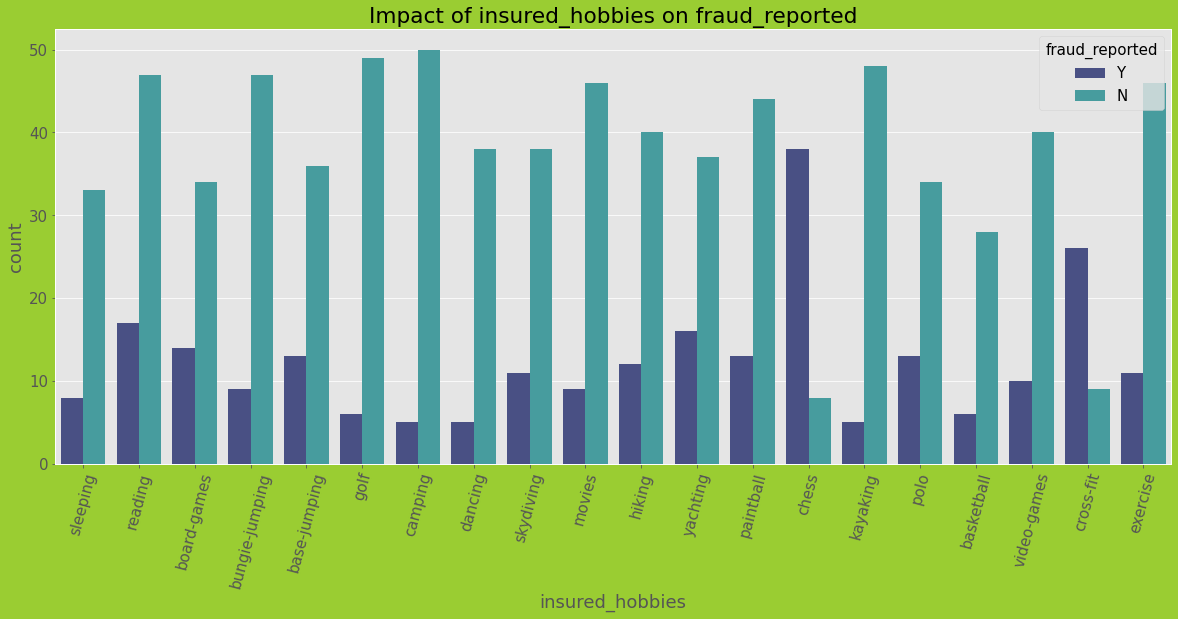

In [49]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot('insured_hobbies',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75);
plt.title('Impact of insured_hobbies on fraud_reported')

##### Outcome : chess has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of insured_relationship on fraud_reported')

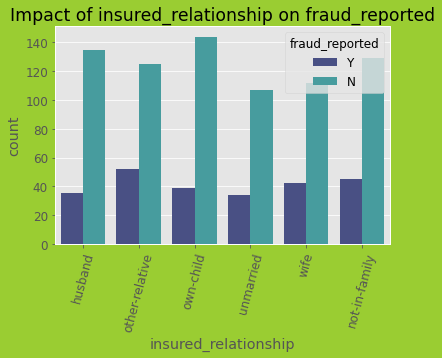

In [50]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':12})
sns.countplot('insured_relationship',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75);
plt.title('Impact of insured_relationship on fraud_reported')

##### Outcome : other-relative has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of incident_type on fraud_reported')

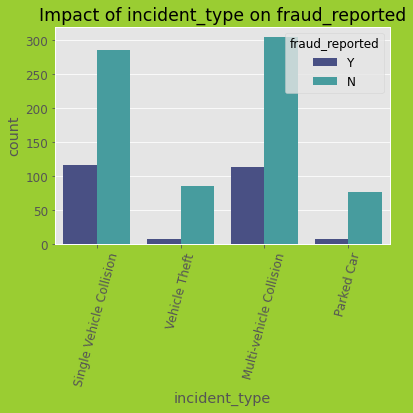

In [51]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':12})
sns.countplot('incident_type',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75);
plt.title('Impact of incident_type on fraud_reported')

##### Outcome : Single Vechicle and Multi-vechicle collision has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of collision_type on fraud_reported')

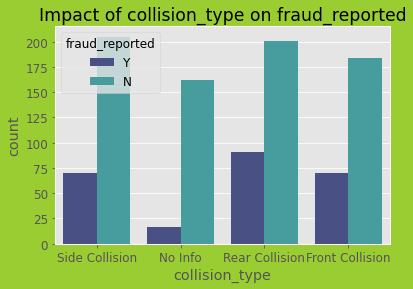

In [52]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':12})
sns.countplot('collision_type',hue='fraud_reported',data=df,palette='mako')
plt.title('Impact of collision_type on fraud_reported')

##### Outcome : Rear collision has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of incident_severity on fraud_reported')

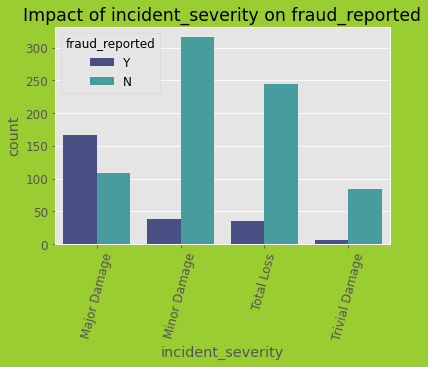

In [53]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':12})
sns.countplot('incident_severity',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75)
plt.title('Impact of incident_severity on fraud_reported')

##### Outcome : Major Damage has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of authorities_contacted on fraud_reported')

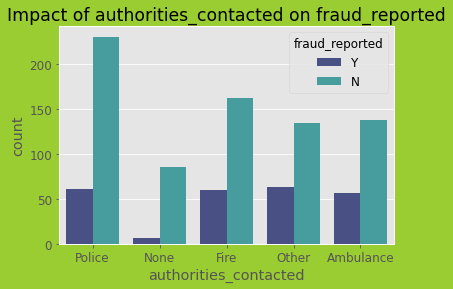

In [54]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':12})
sns.countplot('authorities_contacted',hue='fraud_reported',data=df,palette='mako')
plt.title('Impact of authorities_contacted on fraud_reported')

Text(0.5, 1.0, 'Impact of incident_state on fraud_reported')

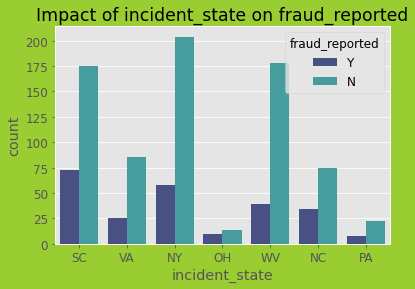

In [55]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':12})
sns.countplot('incident_state',hue='fraud_reported',data=df,palette='mako')
plt.title('Impact of incident_state on fraud_reported')

##### Outcome : SC has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of  on fraud_reported')

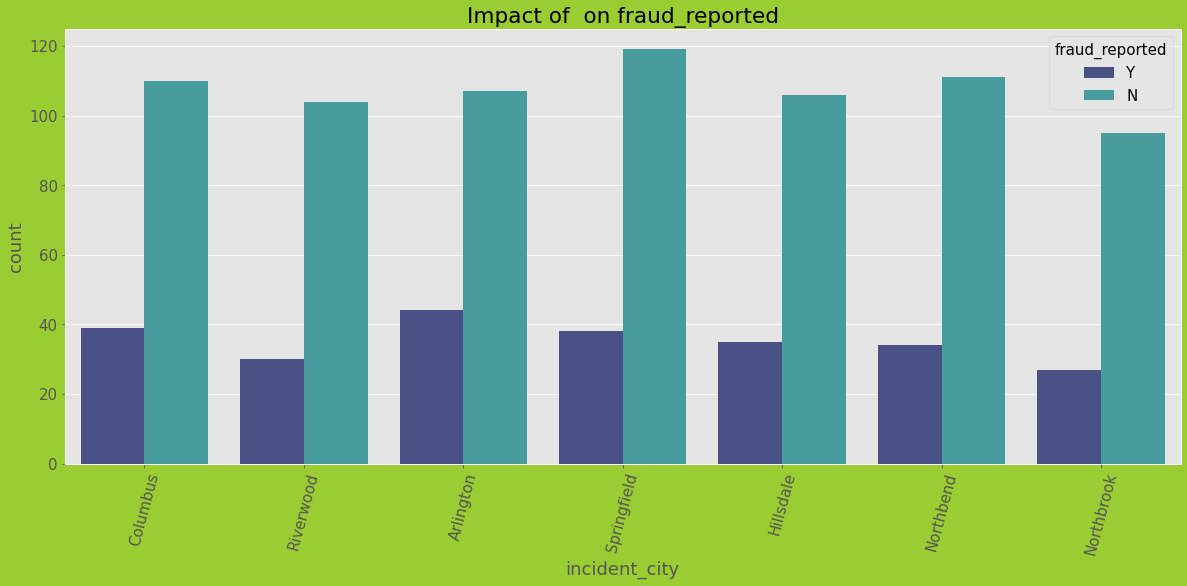

In [56]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot('incident_city',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75)
plt.title('Impact of  on fraud_reported')

##### Outcome : Columbus and Arlington has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of property_damage on fraud_reported')

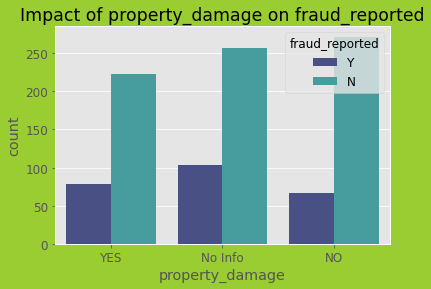

In [57]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':12})
sns.countplot('property_damage',hue='fraud_reported',data=df,palette='mako')
plt.title('Impact of property_damage on fraud_reported')

##### Outcome : Those whose property_damage info is not available has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of police_report_available on fraud_reported')

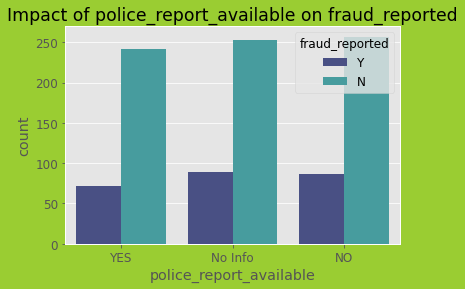

In [58]:
plt.figure(facecolor='YellowGreen')
plt.rcParams.update({'font.size':12})
sns.countplot('police_report_available',hue='fraud_reported',data=df,palette='mako')
plt.title('Impact of police_report_available on fraud_reported')

##### Outcome : Those whose police_report_available is not available or info is not available has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of auto_make on fraud_reported')

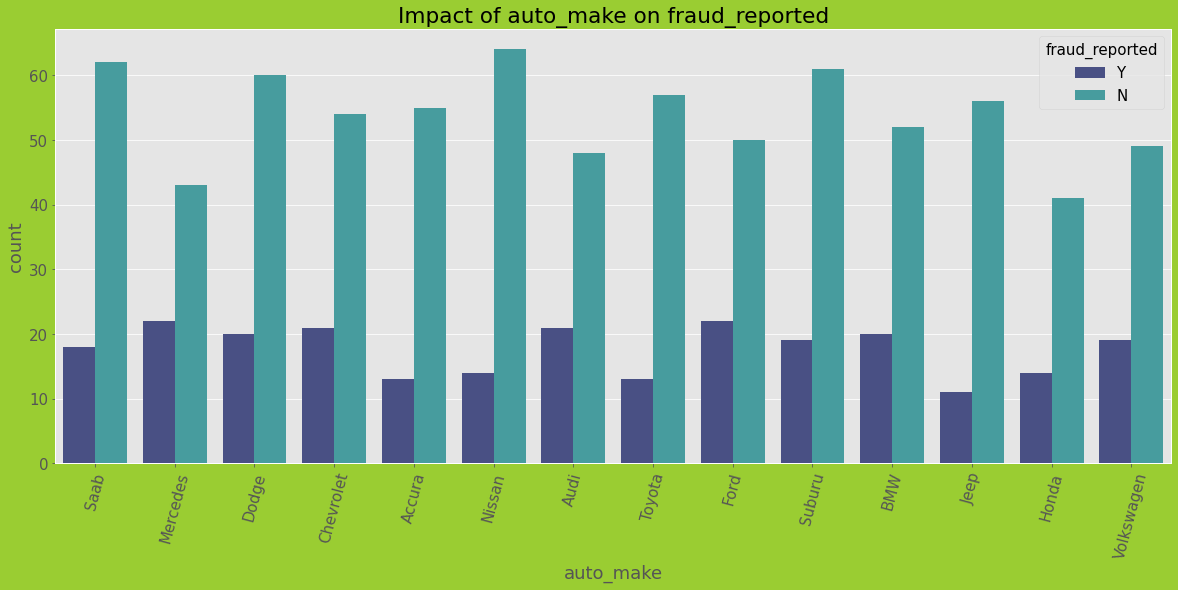

In [59]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot('auto_make',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75)
plt.title('Impact of auto_make on fraud_reported')

##### Outcome : Mercedes has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of auto_model on fraud_reported')

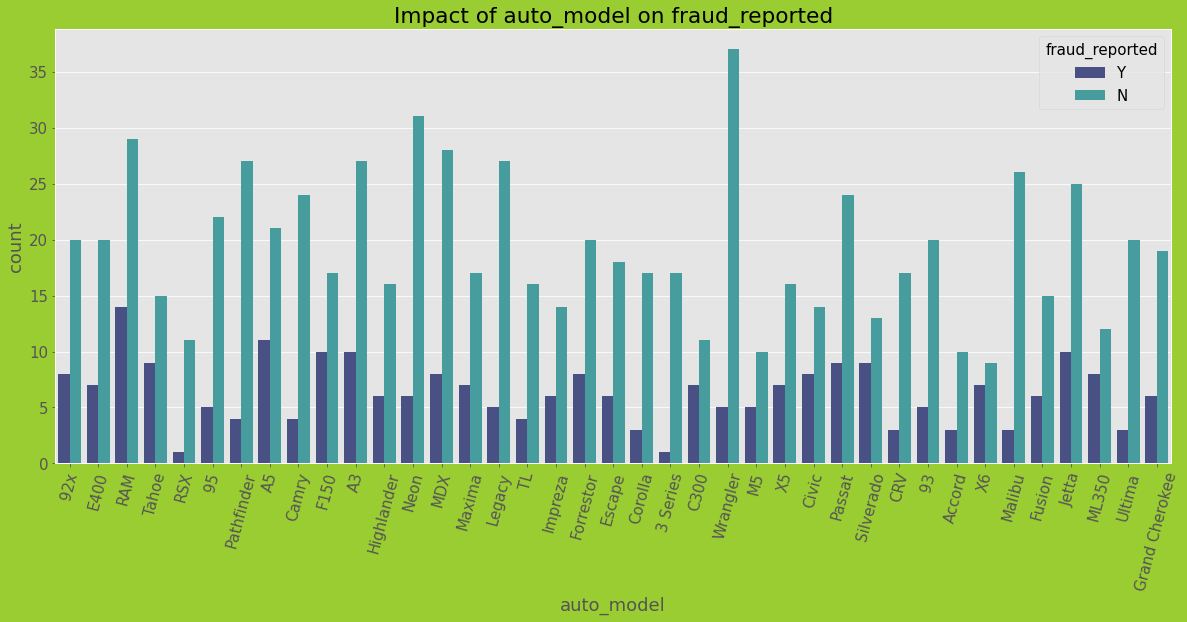

In [60]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot('auto_model',hue='fraud_reported',data=df,palette='mako')
plt.xticks(rotation=75)
plt.title('Impact of auto_model on fraud_reported')

##### Outcome :RAM has high rate of fraud_reported

Text(0.5, 1.0, 'Impact of months_as_customer on fraud_reported')

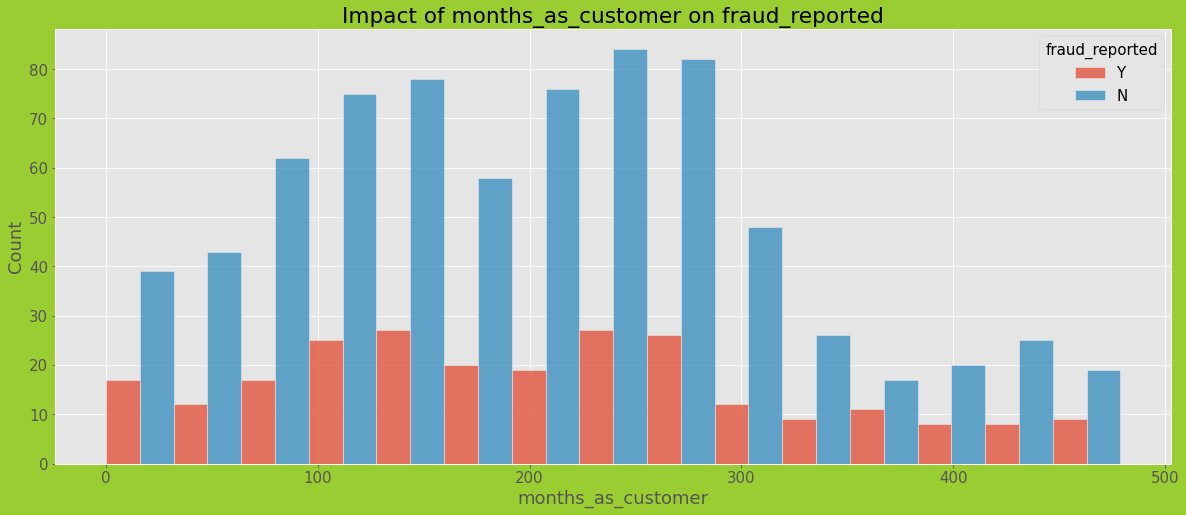

In [61]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='months_as_customer',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of months_as_customer on fraud_reported')

##### Outcome : fraud_reported are high when months_as_customer 100 to 300. 

Text(0.5, 1.0, 'Impact of age on fraud_reported')

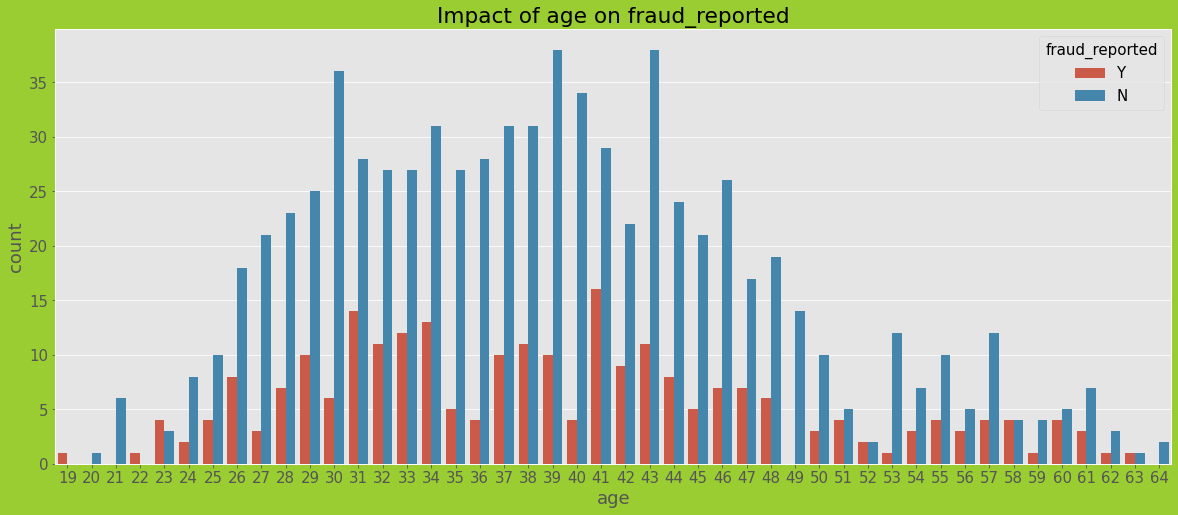

In [62]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='age',hue='fraud_reported',data=df)

plt.title('Impact of age on fraud_reported')

##### Outcome : fraud_reported from age group 23 to 61 and are high when age is 41.

Text(0.5, 1.0, 'Impact of policy_deductable on fraud_reported')

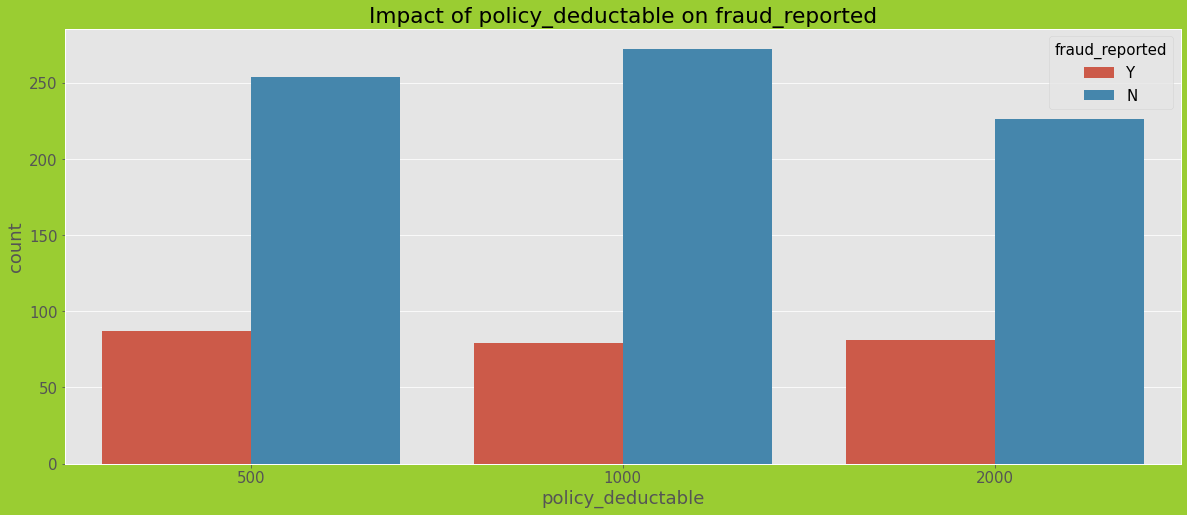

In [63]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='policy_deductable',hue='fraud_reported',data=df)
plt.title('Impact of policy_deductable on fraud_reported')

Text(0.5, 1.0, 'Impact of policy_annual_premium on fraud_reported')

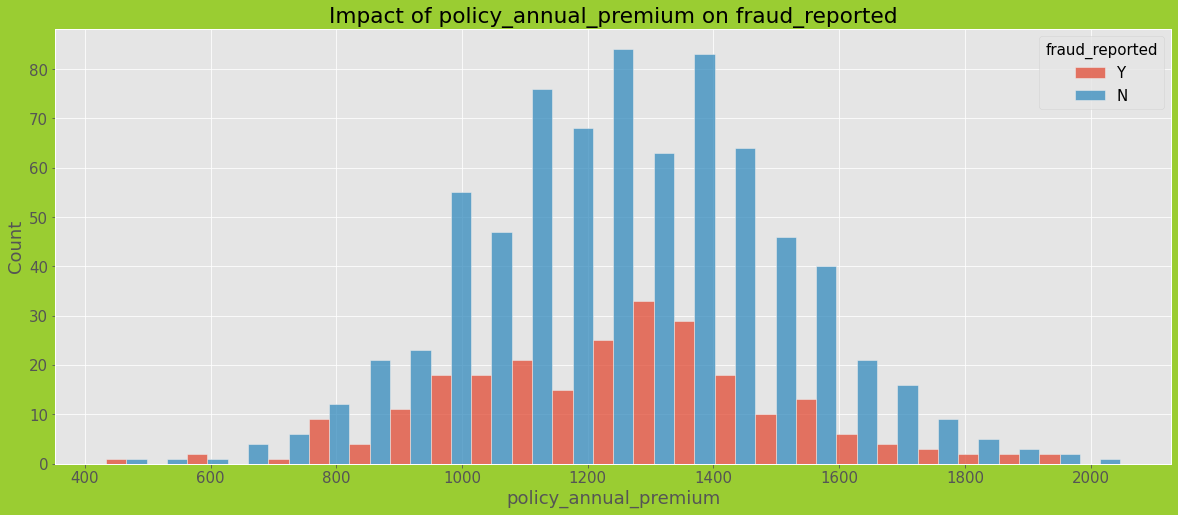

In [64]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='policy_annual_premium',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of policy_annual_premium on fraud_reported')

##### Outcome : fraud_reported when policy_annual_permium between 1200 to 1400.

Text(0.5, 1.0, 'Impact of umbrella_limit on fraud_reported')

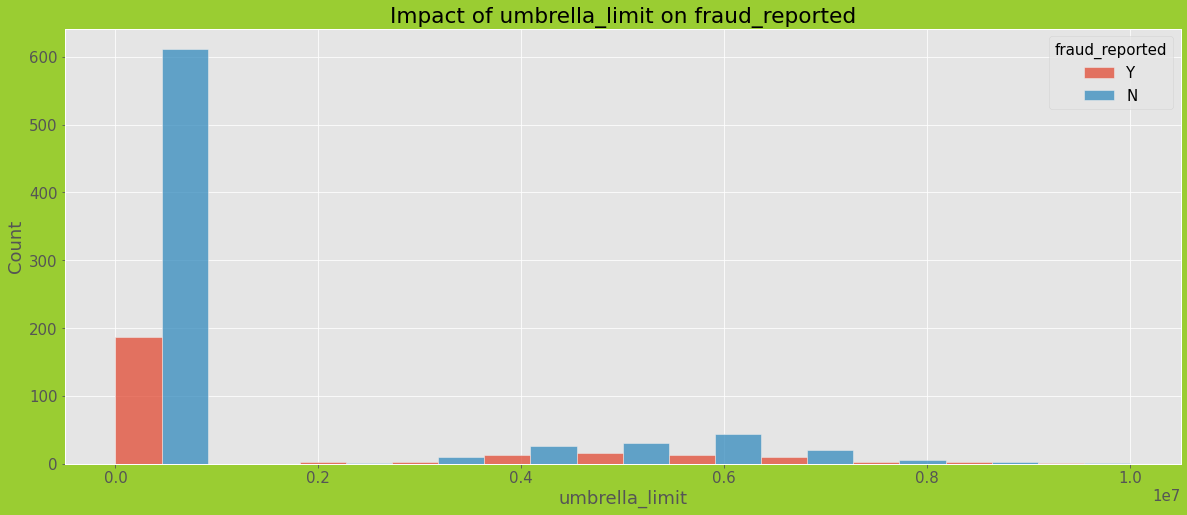

In [65]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='umbrella_limit',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of umbrella_limit on fraud_reported')

Text(0.5, 1.0, 'Impact of capital-gains on fraud_reported')

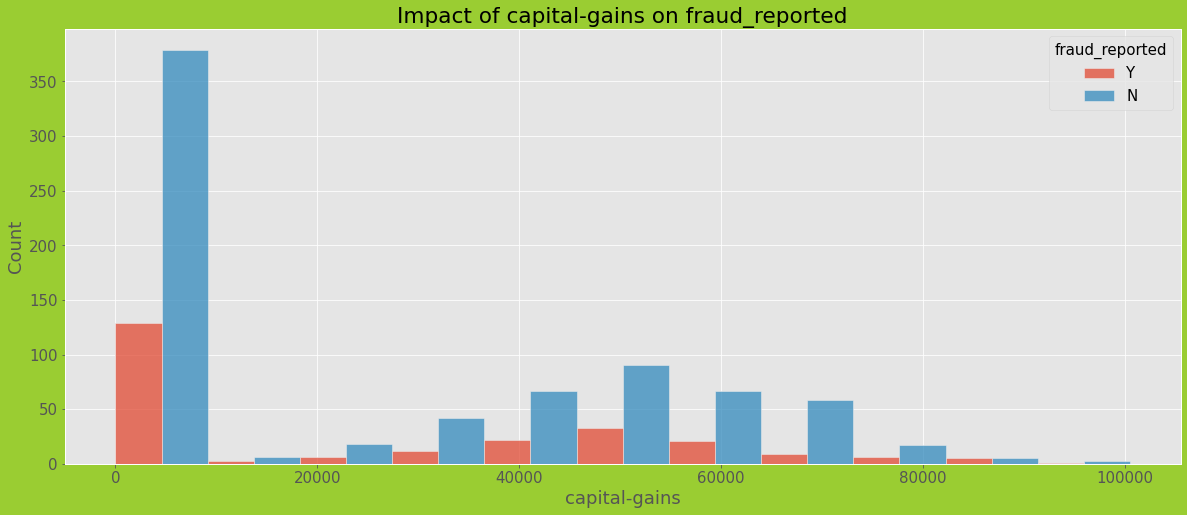

In [66]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='capital-gains',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of capital-gains on fraud_reported')

##### Outcome : fraud_reported is high when capital-gains is 0.

Text(0.5, 1.0, 'Impact of capital-loss on fraud_reported')

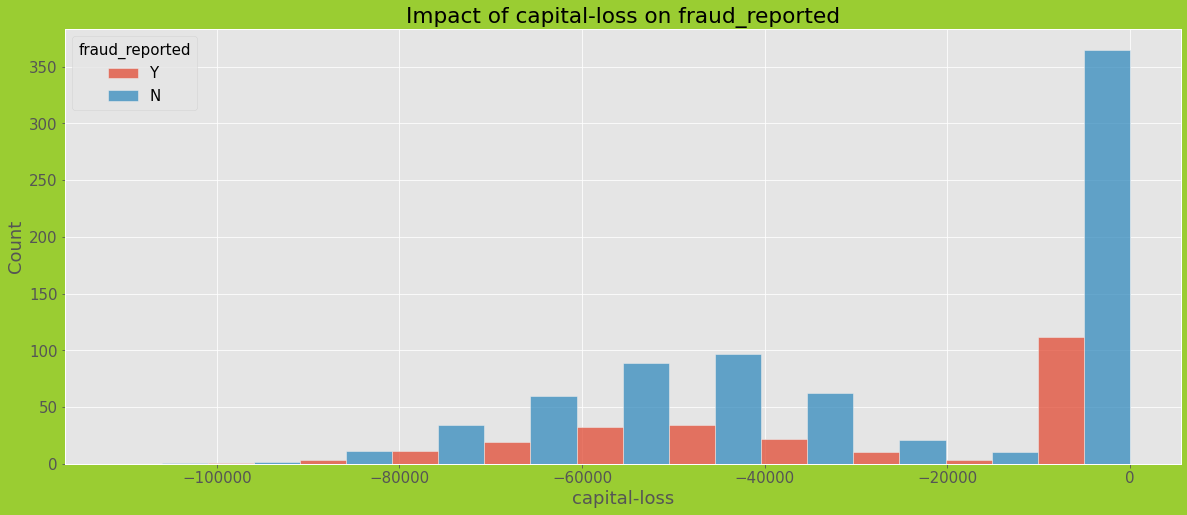

In [67]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='capital-loss',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of capital-loss on fraud_reported')

##### Outcome : fraud_reported is high when capital-loss is 0.

Text(0.5, 1.0, 'Impact of incident_hour_of_the_day on fraud_reported')

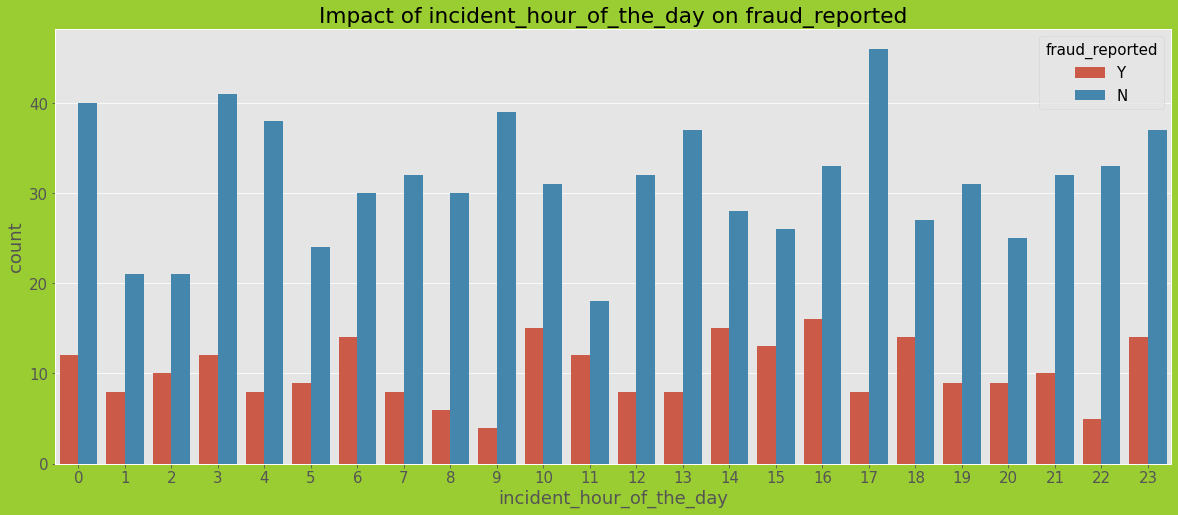

In [68]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='incident_hour_of_the_day',hue='fraud_reported',data=df)
plt.title('Impact of incident_hour_of_the_day on fraud_reported')

##### Outcome : fraud_reported is high in those case when incident_hour_of_the_day are 0,2,3,6,10,11,14,15,16,18 and 23.

Text(0.5, 1.0, 'Impact of number_of_vehicles_involved on fraud_reported')

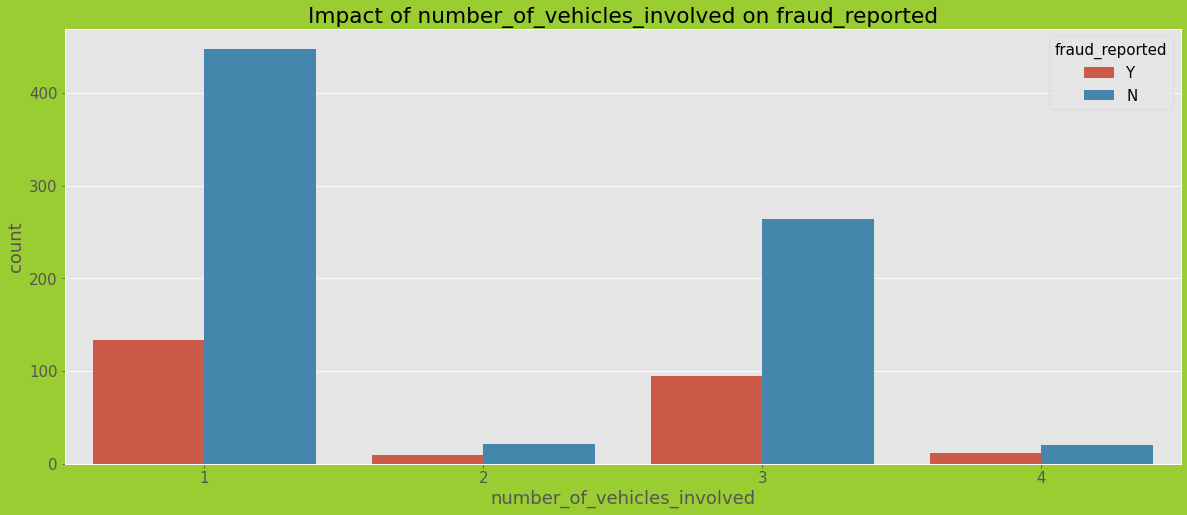

In [69]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)
plt.title('Impact of number_of_vehicles_involved on fraud_reported')

##### Outcome : fraud_reported is high in those case when number_of_vehicles_involved are 1 and 3.

Text(0.5, 1.0, 'Impact of bodily_injuries on fraud_reported')

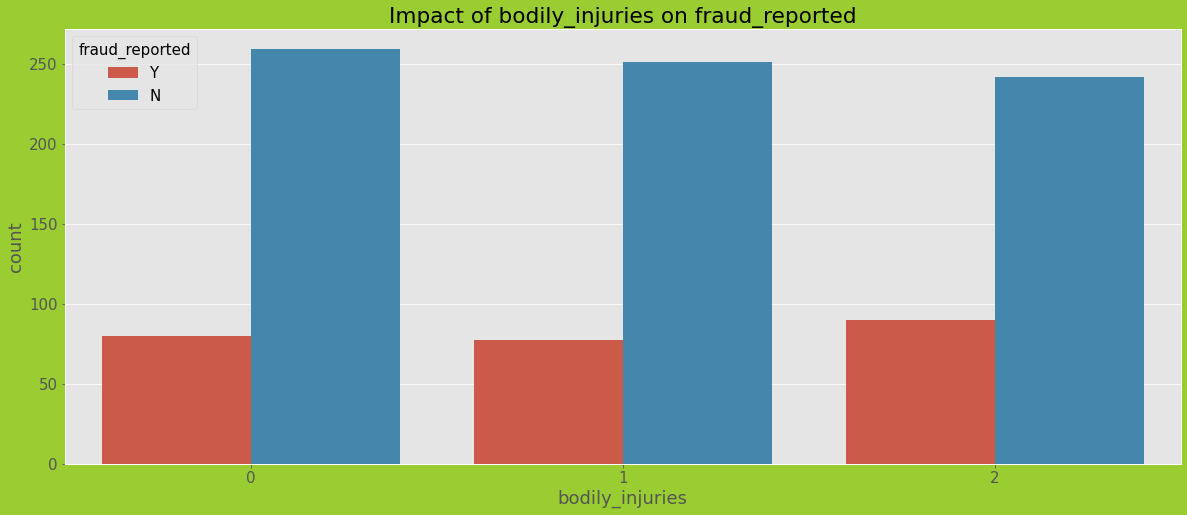

In [70]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='bodily_injuries',hue='fraud_reported',data=df)
plt.title('Impact of bodily_injuries on fraud_reported')

##### Outcome : fraud_reported is almost same in all cases of bodily_injuries

Text(0.5, 1.0, 'Impact of witnesses on fraud_reported')

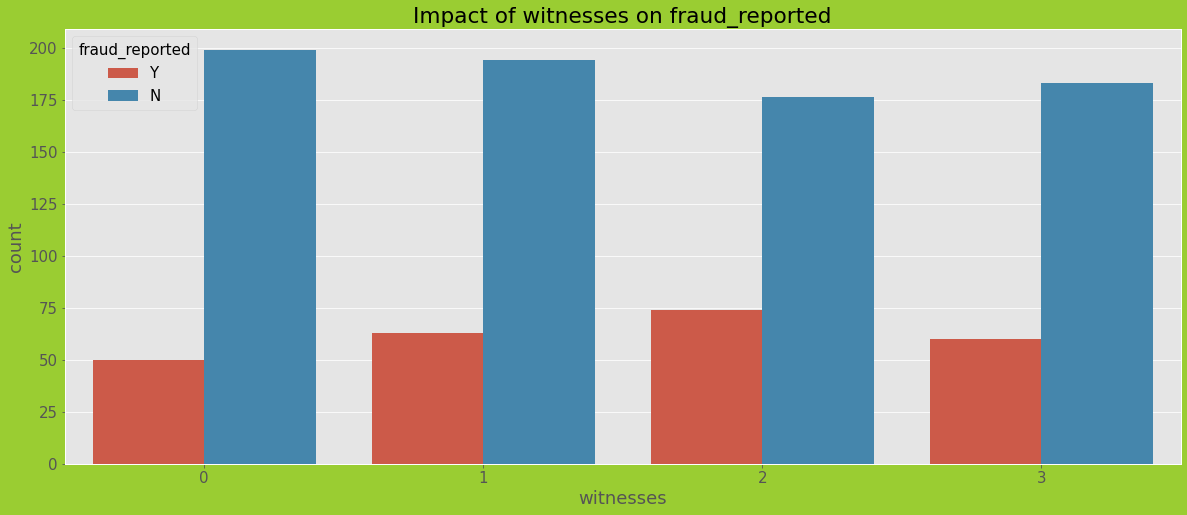

In [71]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='witnesses',hue='fraud_reported',data=df)
plt.title('Impact of witnesses on fraud_reported')

##### Outcome : fraud_reported is high in those case when witnesses is 2.

Text(0.5, 1.0, 'Impact of total_claim_amount on fraud_reported')

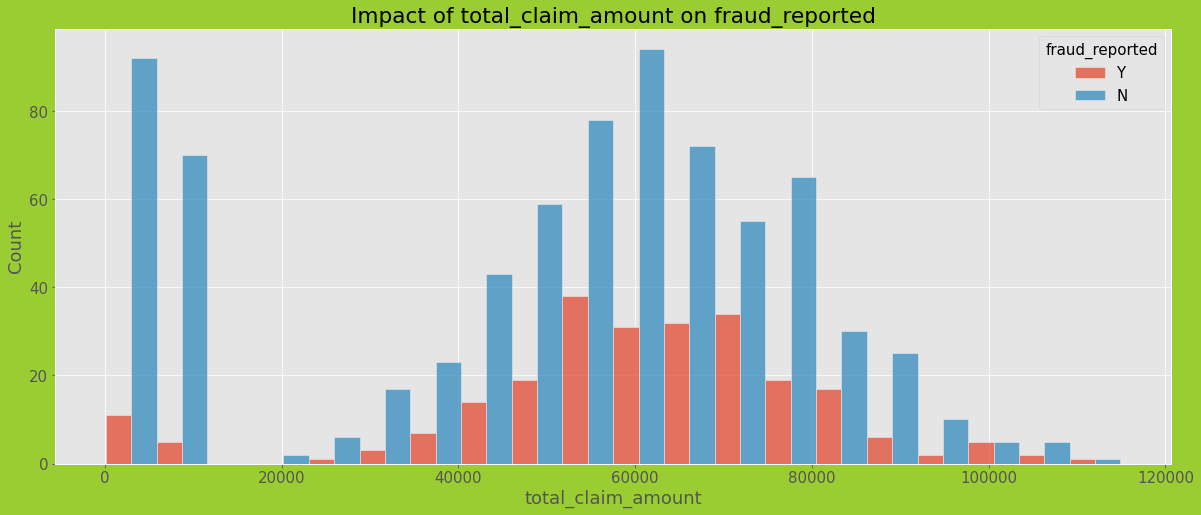

In [72]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='total_claim_amount',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of total_claim_amount on fraud_reported')

##### Outcome : fraud_reported is high in those case when total_claim_amount between 40000 to 80000

Text(0.5, 1.0, 'Impact of injury_claim on fraud_reported')

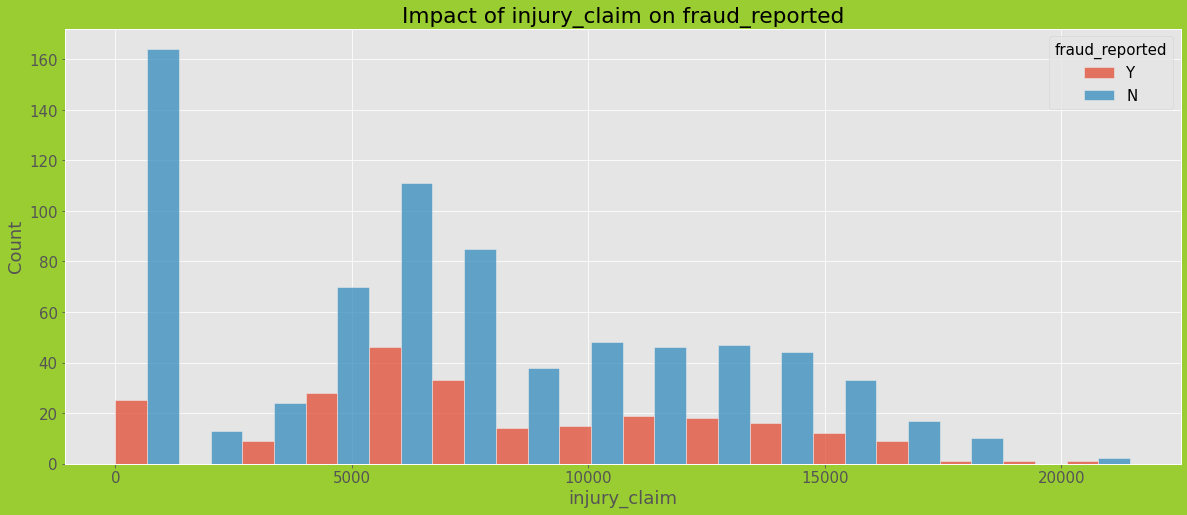

In [73]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='injury_claim',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of injury_claim on fraud_reported')

##### Outcome : fraud_reported is high in those case when injury_claim between 4000 to 10000

Text(0.5, 1.0, 'Impact of property_claim on fraud_reported')

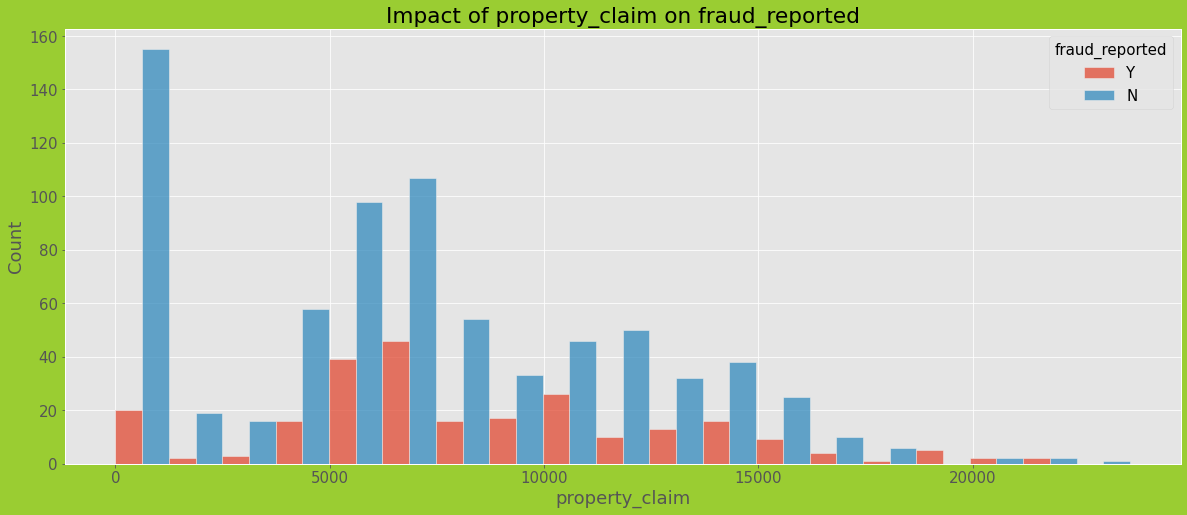

In [74]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='property_claim',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of property_claim on fraud_reported')

##### Outcome : fraud_reported is high in those case when property_claim between 5000 to 10000

Text(0.5, 1.0, 'Impact of vehicle_claim on fraud_reported')

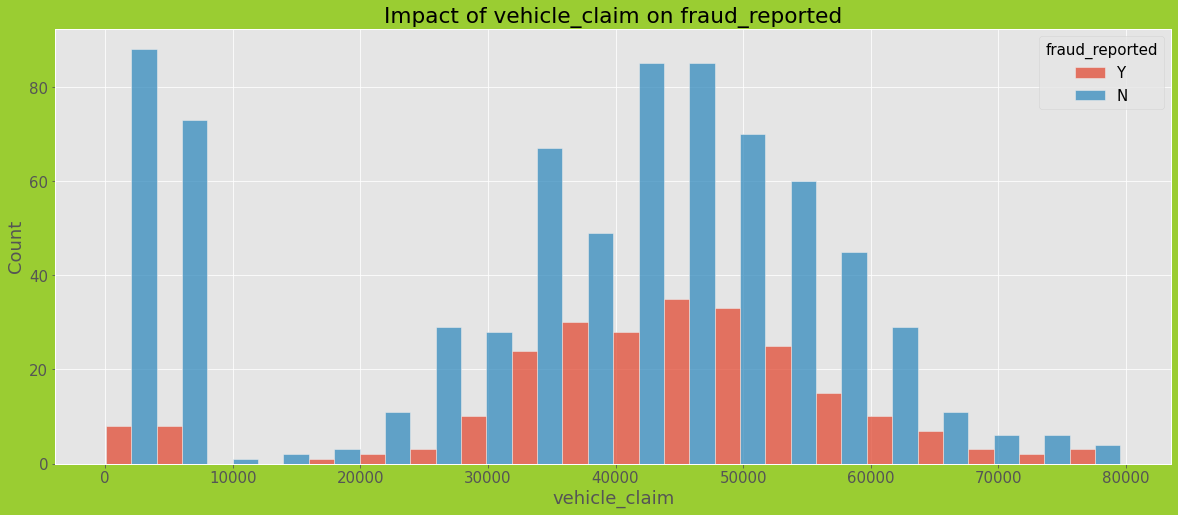

In [75]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.histplot(x='vehicle_claim',hue='fraud_reported',data=df,multiple='dodge')
plt.title('Impact of vehicle_claim on fraud_reported')

##### Outcome : fraud_reported is high in those case when vehicle_claim between 30000 to 50000

Text(0.5, 1.0, 'Impact of auto_year on fraud_reported')

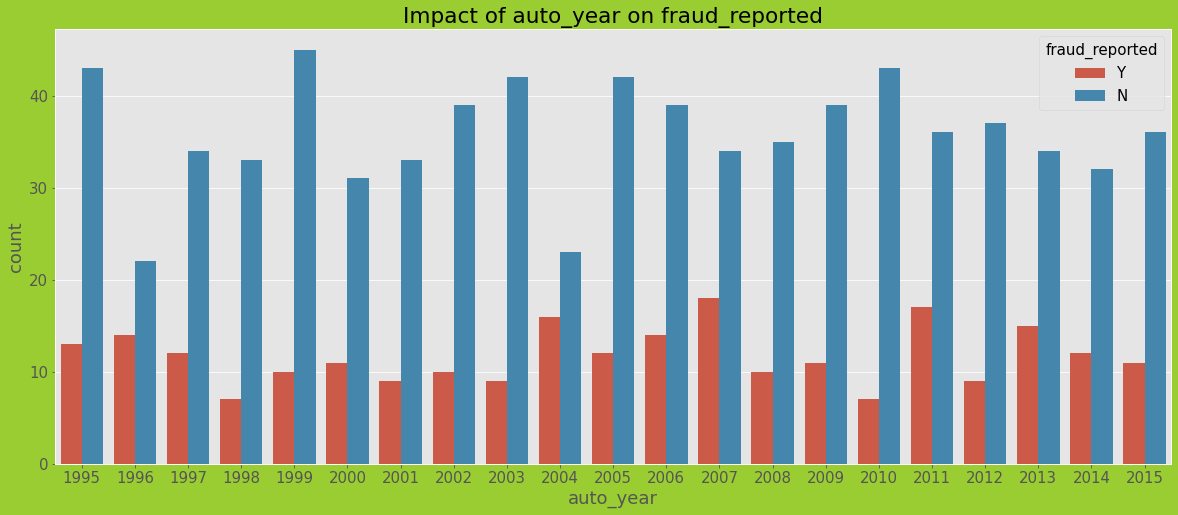

In [76]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.title('Impact of auto_year on fraud_reported')

##### Outcome : fraud_reported is high in those case when auto_year is 1996 and 2004

Text(0.5, 1.0, 'Impact of policy_bind_Date on fraud_reported')

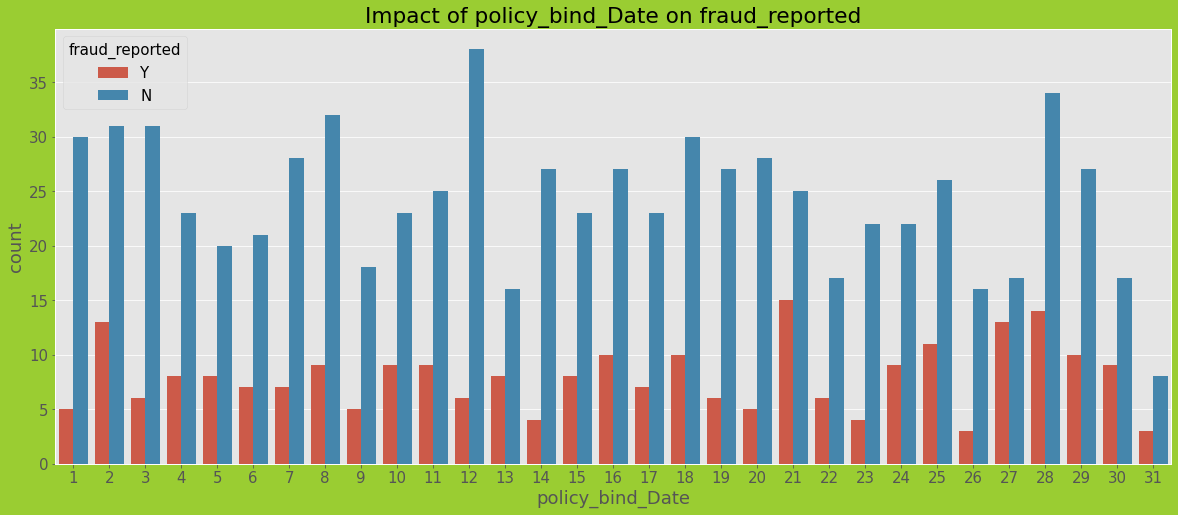

In [77]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='policy_bind_Date',hue='fraud_reported',data=df)
plt.title('Impact of policy_bind_Date on fraud_reported')

##### Outcome : fraud_reported is high in those case when policy_bind_Date is 21

Text(0.5, 1.0, 'Impact of policy_bind_Month on fraud_reported')

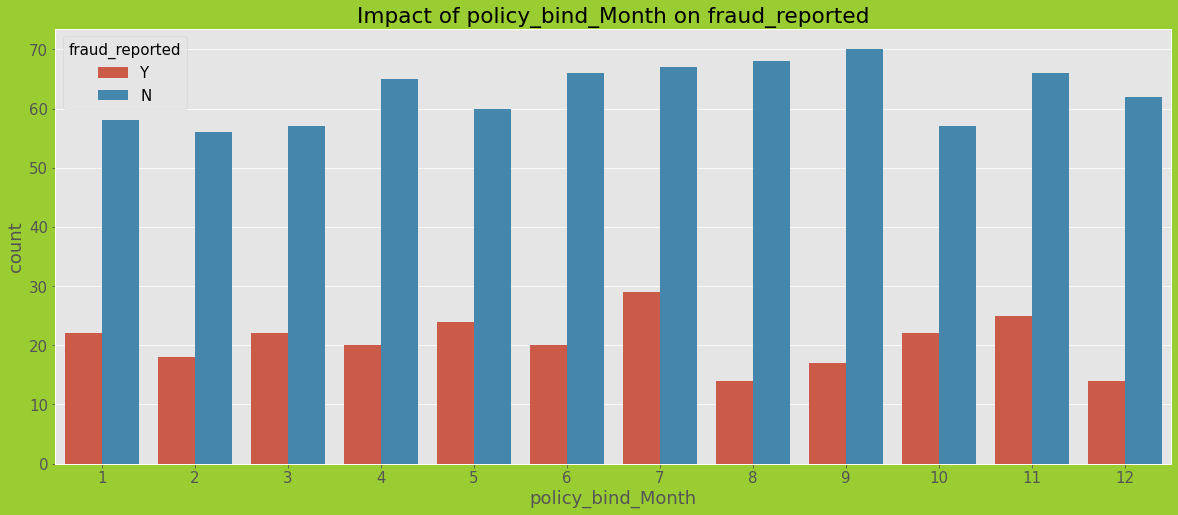

In [78]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='policy_bind_Month',hue='fraud_reported',data=df)
plt.title('Impact of policy_bind_Month on fraud_reported')

##### Outcome : fraud_reported is high in those case when policy_bind_Month is 7

Text(0.5, 1.0, 'Impact of policy_bind_Year on fraud_reported')

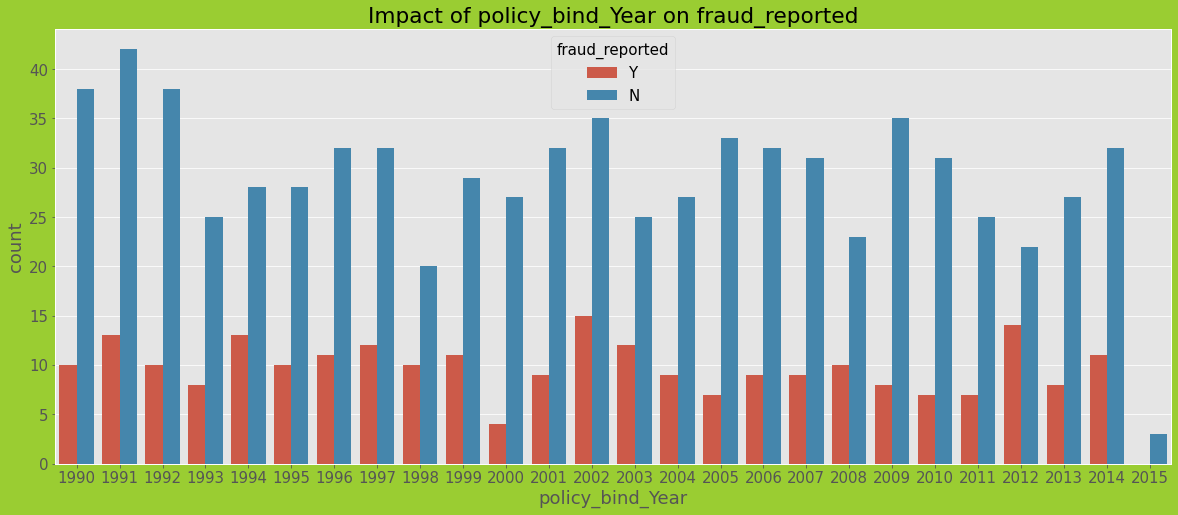

In [79]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.title('Impact of policy_bind_Year on fraud_reported')

##### Outcome : fraud_reported is high in those case when policy_bind_Year is 2012

Text(0.5, 1.0, 'Impact of incident_Date on fraud_reported')

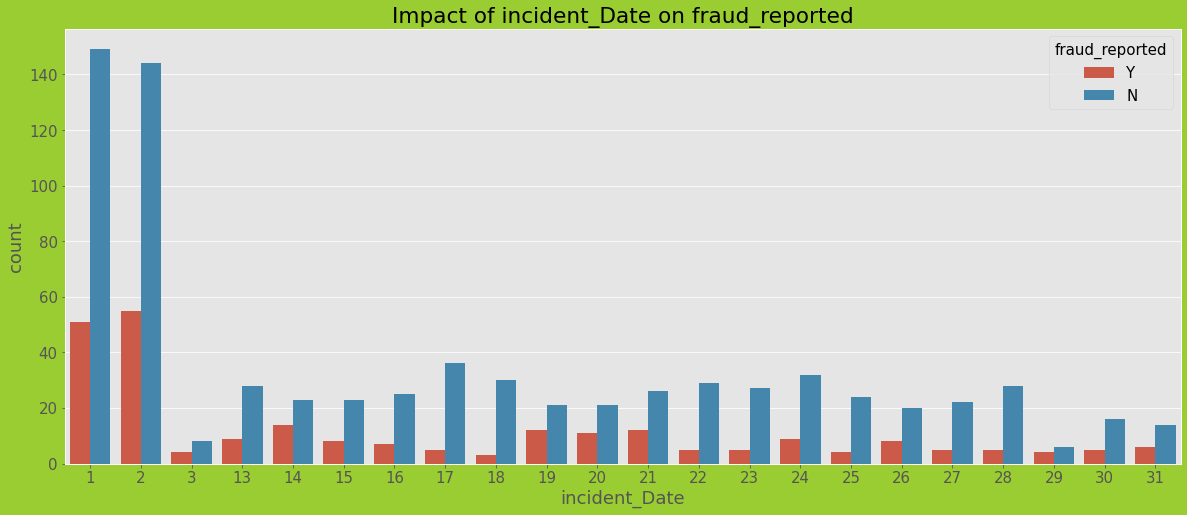

In [80]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='incident_Date',hue='fraud_reported',data=df)
plt.title('Impact of incident_Date on fraud_reported')

##### Outcome : Mostly fraud case incident date is 1 and 2.

Text(0.5, 1.0, 'Impact of incident_Month on fraud_reported')

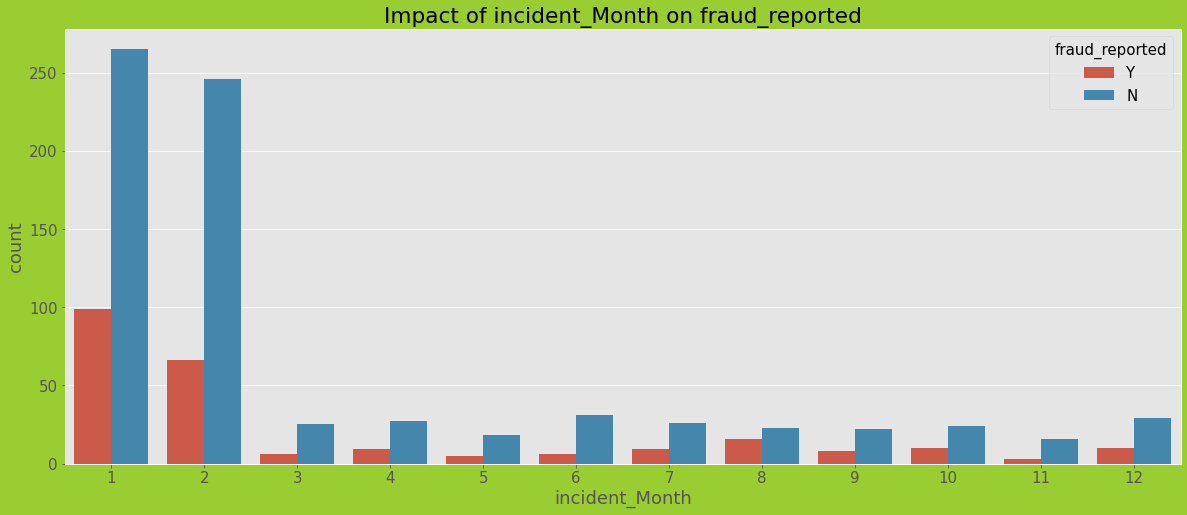

In [81]:
plt.figure(figsize=(20,8),facecolor='YellowGreen')
plt.rcParams.update({'font.size':15})
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)
plt.title('Impact of incident_Month on fraud_reported')

##### Outcome : Mostly fraud case incident month is 1 and 2.

### 7. Features Engineering

#### a). Dealing with outliers

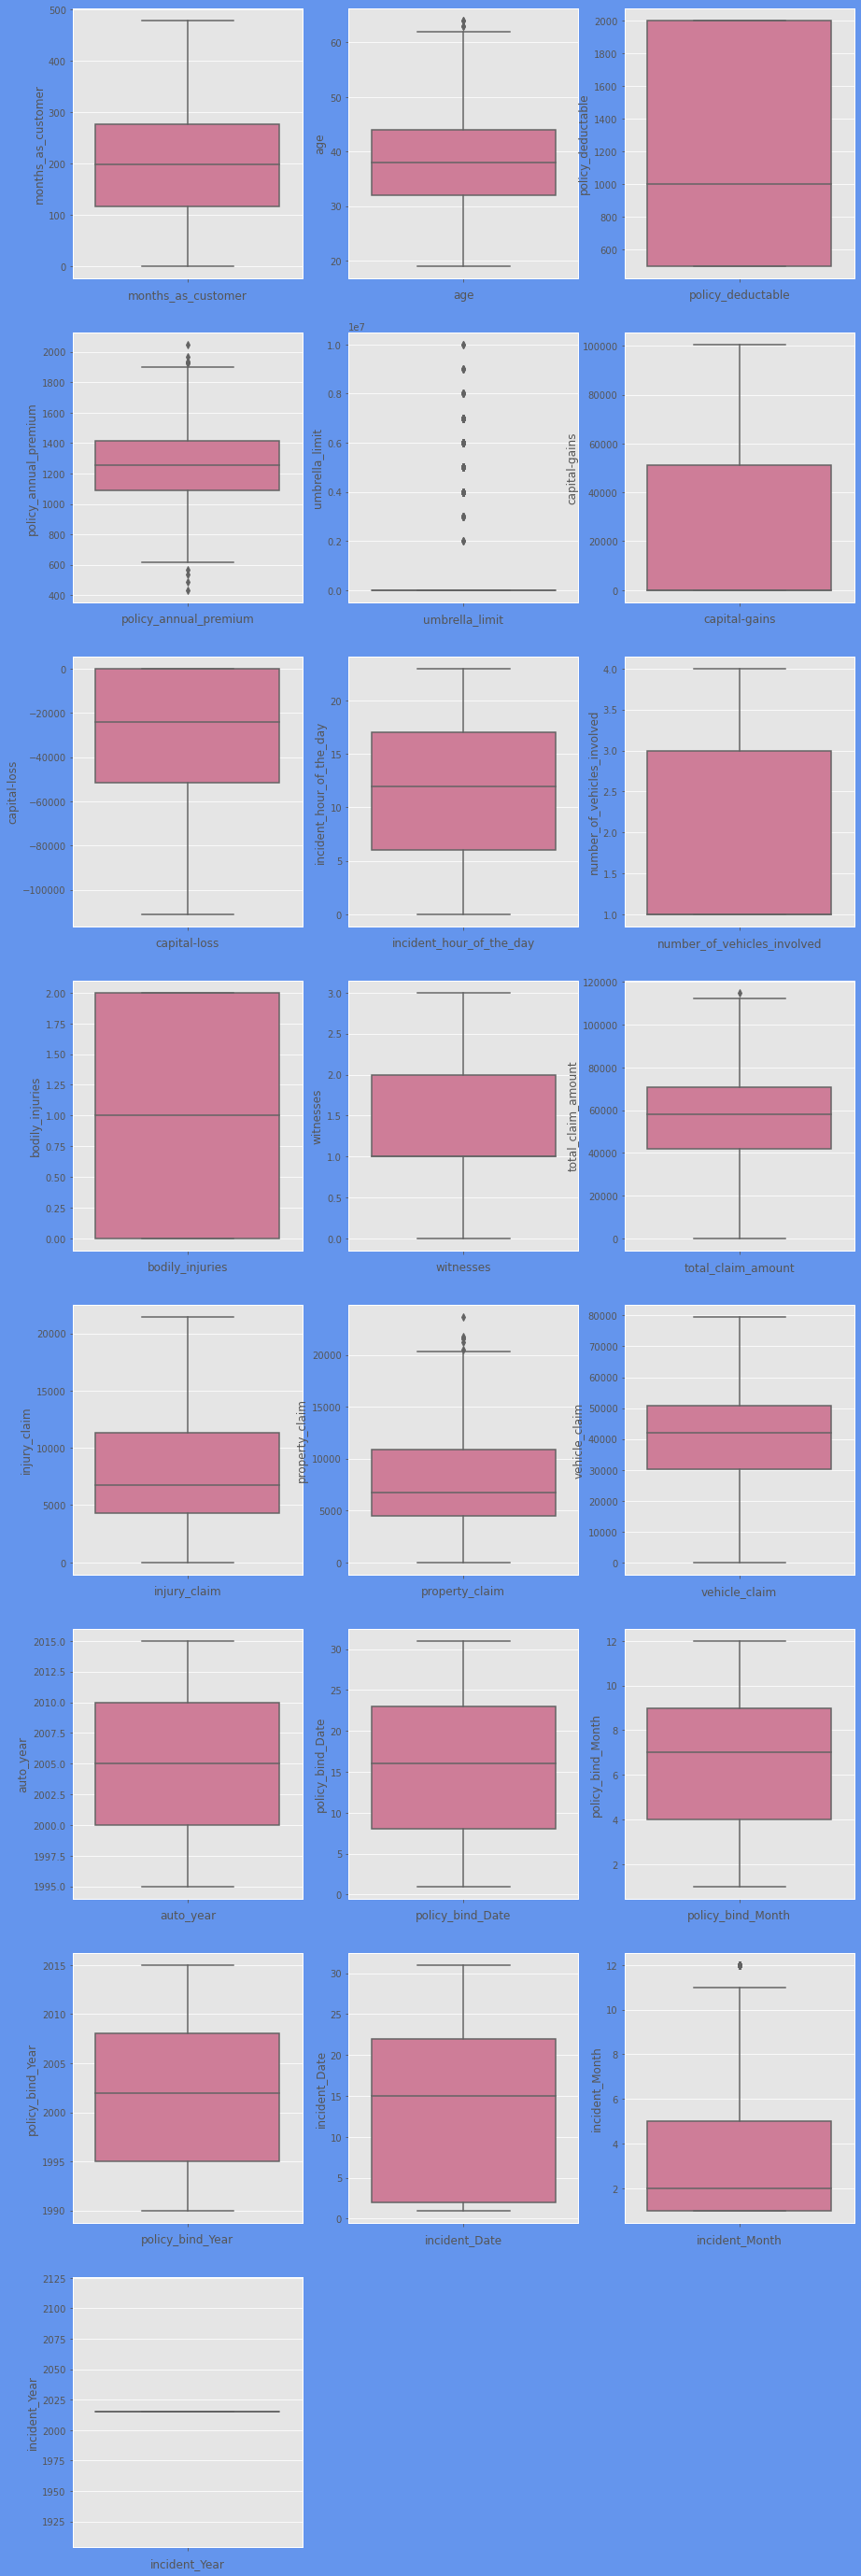

In [82]:
plt.figure(figsize=(15,50),facecolor='CornflowerBlue')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=22:
        ax = plt.subplot(8,3,plot_no)
        sns.boxplot(y=df1[column],color = 'PaleVioletRed')
        plt.xlabel(column,fontsize=12)
    plot_no+=1    
plt.show()    

##### Outcome : Some features are there who contains outliers

In [83]:
from scipy.stats import zscore

In [84]:
z_score = np.abs(zscore(df[['age','umbrella_limit','property_claim','total_claim_amount','incident_Month']]))
print(np.where(z_score>3))

(array([ 31,  48,  88, 115, 119, 262, 313, 429, 457, 499, 502, 656, 699,
       874, 921, 974], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int64))


In [85]:
df_o = df[(z_score<3).all(axis=1)]
print('The shape before outlier remove is :',df.shape)
print('The shape after outlier remove is :',df_o.shape)
print('The loss of data in percentage is :',(df.shape[0]-df_o.shape[0])/df.shape[0]*100)

The shape before outlier remove is : (999, 40)
The shape after outlier remove is : (983, 40)
The loss of data in percentage is : 1.6016016016016015


#### b). Dealing with skewness

In [86]:
df_o.skew()

months_as_customer             0.369490
age                            0.479927
policy_deductable              0.475197
policy_annual_premium          0.007796
umbrella_limit                 1.807475
capital-gains                  0.466842
capital-loss                  -0.385543
incident_hour_of_the_day      -0.032583
number_of_vehicles_involved    0.505944
bodily_injuries                0.005622
witnesses                      0.018718
total_claim_amount            -0.596938
injury_claim                   0.266957
property_claim                 0.357089
vehicle_claim                 -0.623947
auto_year                     -0.055275
policy_bind_Date               0.022186
policy_bind_Month             -0.027812
policy_bind_Year               0.056544
incident_Date                  0.060247
incident_Month                 1.385794
incident_Year                  0.000000
dtype: float64

##### Outcome :
* Skewness +/- 0.5 will be treated.
* categorical and target variable not treated.
* 'umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount', 'vehicle_claim', 'incident_Month' have skewness. 'number_of_vehicles_involved', 'incident_Month' are going to be categorical variable. Rest column skewness will be treated. 

In [87]:
from sklearn.preprocessing import PowerTransformer

In [88]:
pt = PowerTransformer(method='yeo-johnson')

In [89]:
test = ['umbrella_limit','total_claim_amount','vehicle_claim']

In [90]:
df_o[test] = pt.fit_transform(df_o[test].values)

#### c). Encoding categorical using Label Encoder

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
lb = LabelEncoder()

In [93]:
df_o.select_dtypes(include='object').columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [94]:
df_o['incident_Year'] = lb.fit_transform(df_o['incident_Year'])
df_o['incident_Month'] = lb.fit_transform(df_o['incident_Month'])
df_o['incident_Date'] = lb.fit_transform(df_o['incident_Date'])
df_o['policy_bind_Year'] = lb.fit_transform(df_o['policy_bind_Year'])
df_o['policy_bind_Month'] = lb.fit_transform(df_o['policy_bind_Month'])
df_o['policy_bind_Date'] = lb.fit_transform(df_o['policy_bind_Date'])
df_o['policy_state'] = lb.fit_transform(df_o['policy_state'])
df_o['policy_csl'] = lb.fit_transform(df_o['policy_csl'])
df_o['insured_sex'] = lb.fit_transform(df_o['insured_sex'])
df_o['insured_education_level'] = lb.fit_transform(df_o['insured_education_level'])
df_o['insured_occupation'] = lb.fit_transform(df_o['insured_occupation'])
df_o['insured_hobbies'] = lb.fit_transform(df_o['insured_hobbies'])
df_o['insured_relationship'] = lb.fit_transform(df_o['insured_relationship'])
df_o['incident_type'] = lb.fit_transform(df_o['incident_type'])
df_o['collision_type'] = lb.fit_transform(df_o['collision_type'])
df_o['incident_severity'] = lb.fit_transform(df_o['incident_severity'])
df_o['authorities_contacted'] = lb.fit_transform(df_o['authorities_contacted'])
df_o['incident_state'] = lb.fit_transform(df_o['incident_state'])
df_o['incident_city'] = lb.fit_transform(df_o['incident_city'])
df_o['property_damage'] = lb.fit_transform(df_o['property_damage'])
df_o['police_report_available'] = lb.fit_transform(df_o['police_report_available'])
df_o['auto_make'] = lb.fit_transform(df_o['auto_make'])
df_o['auto_model'] = lb.fit_transform(df_o['auto_model'])
df_o['fraud_reported'] = lb.fit_transform(df_o['fraud_reported'])

### 8. Selecting fraud_reported as y as dependent & rest are as X as independent

In [95]:
y = df_o['fraud_reported']
X = df_o.drop(columns='fraud_reported',axis=1)

In [96]:
X

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
0,328,48,2,1,1000,1406.91,-0.483089,1,4,2,...,0.760259,10,1,2004,16,9,24,15,0,0
1,228,42,1,1,2000,1197.22,2.070000,1,4,6,...,-1.786490,8,12,2007,26,5,16,11,0,0
2,134,29,2,0,2000,1413.14,2.070000,0,6,11,...,-0.819559,4,30,2007,8,5,10,12,1,0
3,256,41,0,1,2000,1415.74,2.070903,0,6,1,...,0.683863,3,34,2014,24,4,0,0,9,0
4,228,44,0,2,1000,1583.91,2.070903,1,0,11,...,-1.739939,0,31,2009,5,5,24,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,-0.483089,0,5,2,...,1.267843,6,6,2006,15,6,1,12,1,0
996,285,41,0,0,1000,1436.79,-0.483089,0,6,9,...,1.916291,13,28,2015,0,4,24,14,0,0
997,130,34,2,1,500,1383.49,2.067158,0,5,1,...,0.783888,11,19,1996,16,1,13,13,0,0
998,458,62,0,2,2000,1356.92,2.070000,1,0,5,...,-0.100847,1,5,1998,17,10,21,16,1,0


In [97]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 983, dtype: int32

### 9. Scaling the X using Standard Scaler

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
ss = StandardScaler()

In [100]:
X_scaled = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_scaled

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
0,1.073570,0.986537,1.184405,0.064584,-0.225727,0.614208,-0.483089,1.075036,0.531543,-1.154078,...,0.760259,0.850640,-1.639201,-0.189748,0.170909,1.013282,1.680255,1.259007,-0.734157,0.0
1,0.206279,0.332762,-0.020844,0.064584,1.411832,-0.241478,2.070000,1.075036,0.531543,-0.158720,...,-1.786490,0.354833,-0.650376,0.308975,1.303012,-0.162699,0.596735,0.647995,-0.734157,0.0
2,-0.608974,-1.083750,1.184405,-1.180248,1.411832,0.639631,2.070000,-0.930202,1.557071,1.085476,...,-0.819559,-0.636782,0.967700,0.308975,-0.734772,-0.162699,-0.215905,0.800748,-0.427973,0.0
3,0.449121,0.223800,-1.226092,0.064584,1.411832,0.650240,2.070903,-0.930202,1.557071,-1.402917,...,0.683863,-0.884686,1.327273,1.472664,1.076591,-0.456695,-1.570305,-1.032286,2.021501,0.0
4,0.206279,0.550687,-1.226092,1.309417,-0.225727,1.336495,2.070903,1.075036,-1.519513,1.085476,...,-1.739939,-1.628397,1.057593,0.641458,-1.074403,-0.162699,1.680255,0.036984,-0.427973,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,-1.745124,-0.103088,1.184405,1.309417,-0.225727,0.222010,-0.483089,-0.930202,1.044307,-1.154078,...,1.267843,-0.140975,-1.189735,0.142734,0.057699,0.131296,-1.434865,0.800748,-0.427973,0.0
979,0.700635,0.223800,-1.226092,-1.180248,-0.225727,0.736140,-0.483089,-0.930202,1.557071,0.587797,...,1.916291,1.594351,0.787914,1.638905,-1.640454,-0.456695,1.680255,1.106254,-0.734157,0.0
980,-0.643665,-0.538937,1.184405,0.064584,-1.044506,0.518637,2.067158,-0.930202,1.044307,-1.402917,...,0.783888,1.098544,-0.021124,-1.519679,0.170909,-1.338680,0.190415,0.953501,-0.734157,0.0
981,2.201047,2.512012,-1.226092,1.309417,1.411832,0.410212,2.070000,1.075036,-1.519513,-0.407560,...,-0.100847,-1.380493,-1.279628,-1.187196,0.284120,1.307277,1.273935,1.411760,-0.427973,0.0


### 10. Checking multicolinearity using VIF

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,6.926207,months_as_customer
1,6.938163,age
2,1.035893,policy_state
3,1.029314,policy_csl
4,1.049075,policy_deductable
5,1.034276,policy_annual_premium
6,1.043215,umbrella_limit
7,1.030473,insured_sex
8,1.049264,insured_education_level
9,1.018575,insured_occupation


##### Oucome : total_claim_amount has highest Vif. then vehicle_claim,injury_claim,property_claim. so i need to drop total_claim_amount and check Vif again.

In [103]:
X_scaled.drop(columns=['total_claim_amount','incident_Year'],axis=1,inplace=True)

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_scaled.columns
vif['Vif'] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif

,Features,Vif
0,months_as_customer,6.923629
1,age,6.938126
2,policy_state,1.035871
3,policy_csl,1.028251
4,policy_deductable,1.047882
5,policy_annual_premium,1.033583
6,umbrella_limit,1.043158
7,insured_sex,1.027331
8,insured_education_level,1.049198
9,insured_occupation,1.017853


##### Outcome : Now every colum have less than 10 Vif so i will procced further.

### 11.  Dealing with imbalancing

In [105]:
y.value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
sm = SMOTE()

In [108]:
X_scaled,y = sm.fit_resample(X_scaled,y)

In [109]:
y.value_counts()

0    742
1    742
Name: fraud_reported, dtype: int64

### 12. Observing best random state & split the data using best random state

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,plot_roc_curve,confusion_matrix

In [111]:
lr = LogisticRegression()
max_accuracy = 0
max_rs = 0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=i)
    lr.fit(X_train,y_train)
    lr_pred_rs = lr.predict(X_test)
    lr_accuracy_rs = accuracy_score(y_test,lr_pred_rs)
    if lr_accuracy_rs>max_accuracy:
        max_accuracy = lr_accuracy_rs
        max_rs = i
print('The maximum accuracy is :',max_accuracy, 'On random state :',max_rs)   

The maximum accuracy is : 0.7645739910313901 On random state : 85


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=max_rs)

In [113]:
print('The shape of X_train is :',X_train.shape)
print('The shape of X_test is :',X_test.shape)
print('The shape of y_train is :',y_train.shape)
print('The shape of y_test is :',y_test.shape)

The shape of X_train is : (1038, 37)
The shape of X_test is : (446, 37)
The shape of y_train is : (1038,)
The shape of y_test is : (446,)


### 13. Initiate our model

#### a) Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lg =LogisticRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)
lg_accuracy = accuracy_score(y_test,lg_pred)
lg_cf = classification_report(y_test,lg_pred)
lg_cm = confusion_matrix(y_test,lg_pred)
lg_train_score = lg.score(X_train,y_train)
lg_test_score = lg.score(X_test,y_test)

print('Logistic Regression')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',lg_train_score)
print('The Score on test set is    :',lg_test_score)
print('The Accuracy on test set is :',lg_accuracy)
print('The Classification report is :\n',lg_cf)
print('The Confusion matrix is :\n',lg_cm)
print('\n------------------------------------------------------------------')

Logistic Regression
------------------------------------------------------------------

The Score on train set is   : 0.7321772639691715
The Score on test set is    : 0.7645739910313901
The Accuracy on test set is : 0.7645739910313901
The Classification report is :
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       200
           1       0.81      0.76      0.78       246

    accuracy                           0.76       446
   macro avg       0.76      0.77      0.76       446
weighted avg       0.77      0.76      0.77       446

The Confusion matrix is :
 [[155  45]
 [ 60 186]]

------------------------------------------------------------------


#### Cross Validation on Logistic Regression

In [116]:
from sklearn.model_selection import cross_val_score 

In [117]:
lg_cv_score = cross_val_score(lg,X_train,y_train,cv=5)
print('The cross validation score is :',lg_cv_score.mean())

The cross validation score is : 0.7042920847268673


#### b). KNN Model

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
kc = KNeighborsClassifier()
kc.fit(X_train,y_train)
kc_pred = kc.predict(X_test)
kc_accuracy = accuracy_score(y_test,kc_pred)
kc_cf = classification_report(y_test,kc_pred)
kc_cm = confusion_matrix(y_test,kc_pred)
kc_train_score = kc.score(X_train,y_train)
kc_test_score = kc.score(X_test,y_test)

print('K-Neighbors Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',kc_train_score)
print('The Score on test set is    :',kc_test_score)
print('The Accuracy on test set is :',kc_accuracy)
print('The Classification report is :\n',kc_cf)
print('The Confusion matrix is :\n',kc_cm)
print('\n------------------------------------------------------------------')

K-Neighbors Classifier
------------------------------------------------------------------

The Score on train set is   : 0.7215799614643545
The Score on test set is    : 0.695067264573991
The Accuracy on test set is : 0.695067264573991
The Classification report is :
               precision    recall  f1-score   support

           0       0.89      0.36      0.52       200
           1       0.65      0.96      0.78       246

    accuracy                           0.70       446
   macro avg       0.77      0.66      0.65       446
weighted avg       0.76      0.70      0.66       446

The Confusion matrix is :
 [[ 73 127]
 [  9 237]]

------------------------------------------------------------------


#### Cross validation on K-Neighbors Classifier

In [120]:
kc_cv_score = cross_val_score(kc,X_train,y_train,cv=5)
print('The cross validation score is :',kc_cv_score.mean())

The cross validation score is : 0.6079199182460052


#### c). Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_cf = classification_report(y_test,dt_pred)
dt_cm = confusion_matrix(y_test,dt_pred)
dt_train_score = dt.score(X_train,y_train)
dt_test_score = dt.score(X_test,y_test)

print('Decision Tree Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',dt_train_score)
print('The Score on test set is    :',dt_test_score)
print('The Accuracy on test set is :',dt_accuracy)
print('The Classification report is :\n',dt_cf)
print('The Confusion matrix is :\n',dt_cm)
print('\n------------------------------------------------------------------')

Decision Tree Classifier
------------------------------------------------------------------

The Score on train set is   : 1.0
The Score on test set is    : 0.8318385650224215
The Accuracy on test set is : 0.8318385650224215
The Classification report is :
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       200
           1       0.86      0.83      0.85       246

    accuracy                           0.83       446
   macro avg       0.83      0.83      0.83       446
weighted avg       0.83      0.83      0.83       446

The Confusion matrix is :
 [[166  34]
 [ 41 205]]

------------------------------------------------------------------


#### Cross validation on Decision Tree Classifier

In [123]:
dt_cv_score = cross_val_score(dt,X_train,y_train,cv=5)
print('The cross validation score is :',dt_cv_score.mean())

The cross validation score is : 0.7967623560014865


#### d) Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rc = RandomForestClassifier()
rc.fit(X_train,y_train)
rc_pred = rc.predict(X_test)
rc_accuracy = accuracy_score(y_test,rc_pred)
rc_cf = classification_report(y_test,rc_pred)
rc_cm = confusion_matrix(y_test,rc_pred)
rc_train_score = rc.score(X_train,y_train)
rc_test_score = rc.score(X_test,y_test)

print('Random Forest Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',rc_train_score)
print('The Score on test set is    :',rc_test_score)
print('The Accuracy on test set is :',rc_accuracy)
print('The Classification report is :\n',rc_cf)
print('The Confusion matrix is :\n',rc_cm)
print('\n------------------------------------------------------------------')

Random Forest Classifier
------------------------------------------------------------------

The Score on train set is   : 1.0
The Score on test set is    : 0.8968609865470852
The Accuracy on test set is : 0.8968609865470852
The Classification report is :
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       200
           1       0.95      0.85      0.90       246

    accuracy                           0.90       446
   macro avg       0.90      0.90      0.90       446
weighted avg       0.90      0.90      0.90       446

The Confusion matrix is :
 [[190  10]
 [ 36 210]]

------------------------------------------------------------------


#### Cross validation on Random Forest Classifier

In [126]:
rc_cv_score = cross_val_score(rc,X_train,y_train,cv=5)
print('The cross validation score is :',rc_cv_score.mean())

The cross validation score is : 0.8526291341508733


#### e) Support Vector Machine

In [127]:
from sklearn.svm import SVC

In [128]:
sc = SVC()
sc.fit(X_train,y_train)
sc_pred = sc.predict(X_test)
sc_accuracy = accuracy_score(y_test,sc_pred)
sc_cf = classification_report(y_test,sc_pred)
sc_cm = confusion_matrix(y_test,sc_pred)
sc_train_score = sc.score(X_train,y_train)
sc_test_score = sc.score(X_test,y_test)

print('Support Vector Machine Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',sc_train_score)
print('The Score on test set is    :',sc_test_score)
print('The Accuracy on test set is :',sc_accuracy)
print('The Classification report is :\n',sc_cf)
print('The Confusion matrix is :\n',sc_cm)
print('\n------------------------------------------------------------------')

Support Vector Machine Classifier
------------------------------------------------------------------

The Score on train set is   : 0.9595375722543352
The Score on test set is    : 0.8677130044843049
The Accuracy on test set is : 0.8677130044843049
The Classification report is :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       200
           1       0.90      0.85      0.88       246

    accuracy                           0.87       446
   macro avg       0.87      0.87      0.87       446
weighted avg       0.87      0.87      0.87       446

The Confusion matrix is :
 [[177  23]
 [ 36 210]]

------------------------------------------------------------------


#### Cross validation on Support Vector Machine Classifier

In [129]:
sc_cv_score = cross_val_score(sc,X_train,y_train,cv=5)
print('The cross validation score is :',sc_cv_score.mean())

The cross validation score is : 0.8362736900780379


#### f) Bagging Classifier

In [130]:
from sklearn.ensemble import BaggingClassifier

In [131]:
bc = BaggingClassifier()
bc.fit(X_train,y_train)
bc_pred = bc.predict(X_test)
bc_accuracy = accuracy_score(y_test,bc_pred)
bc_cf = classification_report(y_test,bc_pred)
bc_cm = confusion_matrix(y_test,bc_pred)
bc_train_score = bc.score(X_train,y_train)
bc_test_score = bc.score(X_test,y_test)

print('Bagging Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',bc_train_score)
print('The Score on test set is    :',bc_test_score)
print('The Accuracy on test set is :',bc_accuracy)
print('The Classification report is :\n',bc_cf)
print('The Confusion matrix is :\n',bc_cm)
print('\n------------------------------------------------------------------')

Bagging Classifier
------------------------------------------------------------------

The Score on train set is   : 0.9903660886319846
The Score on test set is    : 0.8923766816143498
The Accuracy on test set is : 0.8923766816143498
The Classification report is :
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       200
           1       0.93      0.87      0.90       246

    accuracy                           0.89       446
   macro avg       0.89      0.89      0.89       446
weighted avg       0.90      0.89      0.89       446

The Confusion matrix is :
 [[184  16]
 [ 32 214]]

------------------------------------------------------------------


#### Cross validation on Bagging Classifier

In [132]:
bc_cv_score = cross_val_score(bc,X_train,y_train,cv=5)
print('The cross validation score is :',bc_cv_score.mean())

The cross validation score is : 0.846808807134894


#### g). Gradient Boosting Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
gc = GradientBoostingClassifier()
gc.fit(X_train,y_train)
gc_pred = gc.predict(X_test)
gc_accuracy = accuracy_score(y_test,gc_pred)
gc_cf = classification_report(y_test,gc_pred)
gc_cm = confusion_matrix(y_test,gc_pred)
gc_train_score = gc.score(X_train,y_train)
gc_test_score = gc.score(X_test,y_test)

print('Gradient Boosting Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',gc_train_score)
print('The Score on test set is    :',gc_test_score)
print('The Accuracy on test set is :',gc_accuracy)
print('The Classification report is :\n',gc_cf)
print('The Confusion matrix is :\n',gc_cm)
print('\n------------------------------------------------------------------')

Gradient Boosting Classifier
------------------------------------------------------------------

The Score on train set is   : 0.9701348747591522
The Score on test set is    : 0.9327354260089686
The Accuracy on test set is : 0.9327354260089686
The Classification report is :
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       200
           1       0.95      0.93      0.94       246

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446

The Confusion matrix is :
 [[187  13]
 [ 17 229]]

------------------------------------------------------------------


#### Cross validation on Gradient Boosting Classifier

In [135]:
gc_cv_score = cross_val_score(gc,X_train,y_train,cv=5)
print('The cross validation score is :',gc_cv_score.mean())

The cross validation score is : 0.8584076551467856


#### h). AdaBoost Classifier

In [136]:
from sklearn.ensemble import AdaBoostClassifier

In [137]:
ac = AdaBoostClassifier()
ac.fit(X_train,y_train)
ac_pred = ac.predict(X_test)
ac_accuracy = accuracy_score(y_test,ac_pred)
ac_cf = classification_report(y_test,ac_pred)
ac_cm = confusion_matrix(y_test,ac_pred)
ac_train_score = ac.score(X_train,y_train)
ac_test_score = ac.score(X_test,y_test)

print('AdaBoost Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',ac_train_score)
print('The Score on test set is    :',ac_test_score)
print('The Accuracy on test set is :',ac_accuracy)
print('The Classification report is :\n',ac_cf)
print('The Confusion matrix is :\n',ac_cm)
print('\n------------------------------------------------------------------')

AdaBoost Classifier
------------------------------------------------------------------

The Score on train set is   : 0.8921001926782274
The Score on test set is    : 0.8834080717488789
The Accuracy on test set is : 0.8834080717488789
The Classification report is :
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       200
           1       0.94      0.85      0.89       246

    accuracy                           0.88       446
   macro avg       0.88      0.89      0.88       446
weighted avg       0.89      0.88      0.88       446

The Confusion matrix is :
 [[186  14]
 [ 38 208]]

------------------------------------------------------------------


#### Cross validation on AdaBoost Classifier

In [138]:
ac_cv_score = cross_val_score(ac,X_train,y_train,cv=5)
print('The cross validation score is :',ac_cv_score.mean())

The cross validation score is : 0.8092902266815309


#### i). XGB Classifier

In [139]:
import xgboost as xb

In [140]:
xc = xb.XGBClassifier()
xc.fit(X_train,y_train)
xc_pred = xc.predict(X_test)
xc_accuracy = accuracy_score(y_test,xc_pred)
xc_cf = classification_report(y_test,xc_pred)
xc_cm = confusion_matrix(y_test,xc_pred)
xc_train_score = xc.score(X_train,y_train)
xc_test_score = xc.score(X_test,y_test)

print('XGB Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',xc_train_score)
print('The Score on test set is    :',xc_test_score)
print('The Accuracy on test set is :',xc_accuracy)
print('The Classification report is :\n',xc_cf)
print('The Confusion matrix is :\n',xc_cm)
print('\n------------------------------------------------------------------')

[22:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier
------------------------------------------------------------------

The Score on train set is   : 1.0
The Score on test set is    : 0.9260089686098655
The Accuracy on test set is : 0.9260089686098655
The Classification report is :
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       200
           1       0.94      0.93      0.93       246

    accuracy                           0.93       446
   macro avg       0.92      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446

The Confusion matrix is :
 [[185  15]
 [ 18 228]]

-----------------------------------------------------------------

#### Cross validation on XGB Classifier

In [141]:
xc_cv_score = cross_val_score(xc,X_train,y_train,cv=5)
print('The cross validation score is :',xc_cv_score.mean())

[22:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### 14. ROC Curve

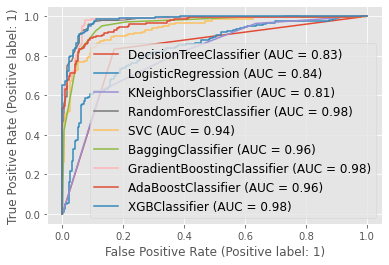

In [142]:
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lg,X_test,y_test,ax=disp.ax_)
plot_roc_curve(kc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(sc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(ac,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xc,X_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size' : 12},loc='lower right')
plt.show()

##### Outcome : From above Random Forest Classifier, Gradient Boosting Classifier, XGB Classifier have best score.

### 15. Observing Score of all model

In [143]:
all_score = pd.DataFrame()

In [144]:
all_score['Model Name'] = ['Logistic Regression','KNeighbors Classifier','Decision Tree Classifier','Random Forest Classifier','Support Vector Machine Classifier','Bagging Classifier','Gradient Boosting Classifier','AdaBoost Classifier','XGB Classifier']
all_score['Train Score'] = [lg_train_score,kc_train_score,dt_train_score,rc_train_score,sc_train_score,bc_train_score,gc_train_score,ac_train_score,xc_train_score]
all_score['Test Score'] = [lg_test_score,kc_test_score,dt_test_score,rc_test_score,sc_test_score,bc_test_score,gc_test_score,ac_test_score,xc_test_score]
all_score['Accuracy Score'] = [lg_accuracy,kc_accuracy,dt_accuracy,rc_accuracy,sc_accuracy,bc_accuracy,gc_accuracy,ac_accuracy,xc_accuracy]
all_score['Cross Validation Score'] = [lg_cv_score.mean(),kc_cv_score.mean(),dt_cv_score.mean(),rc_cv_score.mean(),sc_cv_score.mean(),bc_cv_score.mean(),gc_cv_score.mean(),ac_cv_score.mean(),xc_cv_score.mean()]

In [145]:
all_score

,Model Name,Train Score,Test Score,Accuracy Score,Cross Validation Score
0,Logistic Regression,0.732177,0.764574,0.764574,0.704292
1,KNeighbors Classifier,0.721580,0.695067,0.695067,0.607920
2,Decision Tree Classifier,1.000000,0.831839,0.831839,0.796762
3,Random Forest Classifier,1.000000,0.896861,0.896861,0.852629
4,Support Vector Machine Classifier,0.959538,0.867713,0.867713,0.836274
5,Bagging Classifier,0.990366,0.892377,0.892377,0.846809
6,Gradient Boosting Classifier,0.970135,0.932735,0.932735,0.858408
7,AdaBoost Classifier,0.892100,0.883408,0.883408,0.809290
8,XGB Classifier,1.000000,0.926009,0.926009,0.864182


Text(0.5, 1.0, 'Train Score Analysis')

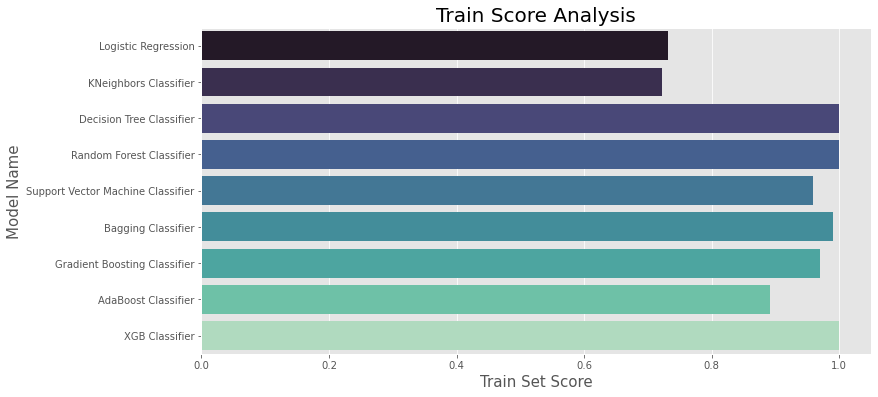

In [146]:
plt.figure(figsize=(12,6))
sns.barplot('Train Score','Model Name',data=all_score,palette = "mako")
plt.xlabel('Train Set Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Train Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Test Score Analysis')

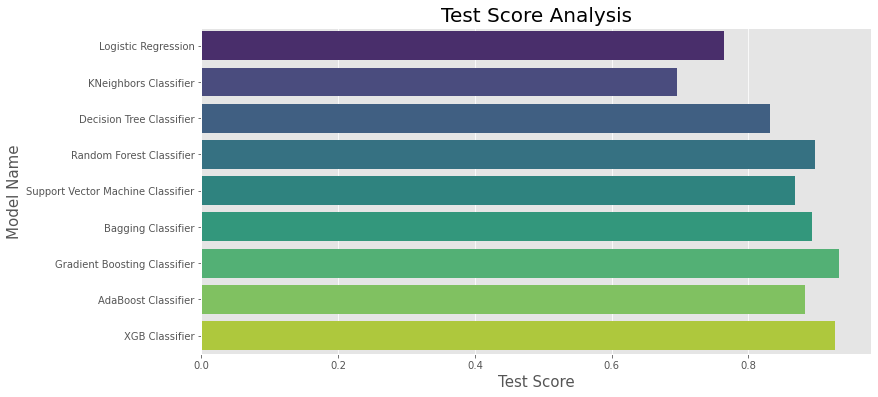

In [147]:
plt.figure(figsize=(12,6))
sns.barplot('Test Score','Model Name',data=all_score,palette = "viridis")
plt.xlabel('Test Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Test Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Accuracy Score Analysis')

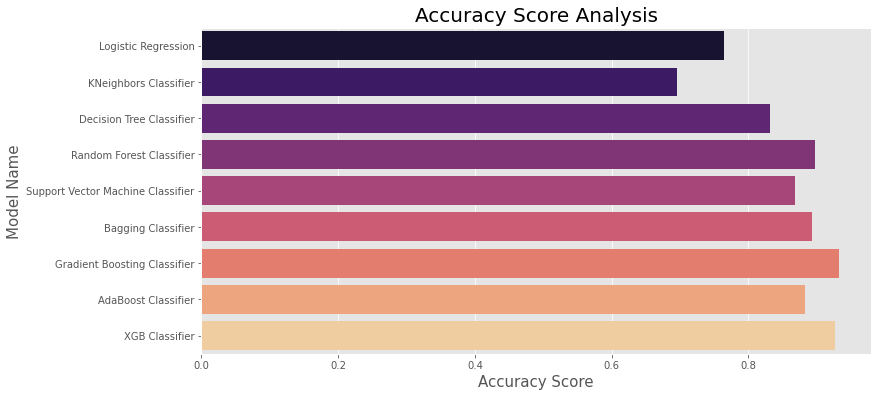

In [148]:
plt.figure(figsize=(12,6))
sns.barplot('Accuracy Score','Model Name',data=all_score,palette = "magma")
plt.xlabel('Accuracy Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Accuracy Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Cross Validation Score Analysis')

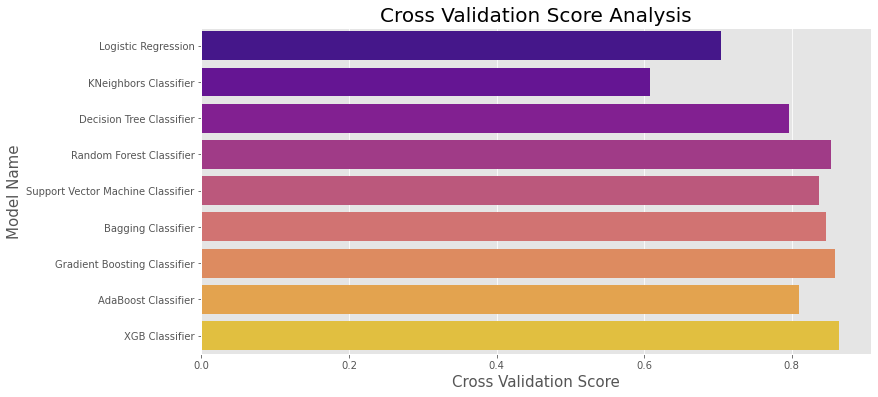

In [149]:
plt.figure(figsize=(12,6))
sns.barplot('Cross Validation Score','Model Name',data=all_score,palette = "plasma")
plt.xlabel('Cross Validation Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Cross Validation Score Analysis',fontsize=20)

##### Outcome : Random Forest Classifier, Gradient Boosting Classifier and XGB Classifier all model are good based on accuracy. Based on difference between accuracy and cross validation score Random Forest Classifier has less score. So Random Forest Classifier is best model on this data set for me.

### 14. Hyperparameter Tunning on Random forest Classifier using GridSearch CV

In [150]:
from sklearn.model_selection import GridSearchCV

In [152]:
clf = RandomForestClassifier()

param = {'n_estimators' : [200,50,100],
         'criterion' : ["gini", "entropy"],
         'max_features' : ["auto", "sqrt", "log2"],
         'min_samples_split' : [2,3,4]
         }

grd = GridSearchCV(clf,param_grid=param)
grd.fit(X_train,y_train)
print("Best parameter",grd.best_params_)

clf = grd.best_estimator_

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

ac_con = confusion_matrix(y_test,y_pred)

print("\n Confusion Matrix \n",ac_con)
print("Accuracy after hyper parameter tunning",accuracy_score(y_test,y_pred))

Best parameter {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 100}

 Confusion Matrix 
 [[188  12]
 [ 24 222]]
Accuracy after hyper parameter tunning 0.9192825112107623


##### Outcome : After Hyperparameter tunning i am able to improve accuracy.

### 15. Fit the model using best parameter

In [153]:
rc = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='log2',min_samples_split=3)
rc.fit(X_train,y_train)
rc_pred = rc.predict(X_test)
rc_accuracy = accuracy_score(y_test,rc_pred)
rc_cf = classification_report(y_test,rc_pred)
rc_cm = confusion_matrix(y_test,rc_pred)
rc_train_score = rc.score(X_train,y_train)
rc_test_score = rc.score(X_test,y_test)

print('Random Forest Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',rc_train_score)
print('The Score on test set is    :',rc_test_score)
print('The Accuracy on test set is :',rc_accuracy)
print('The Classification report is :\n',rc_cf)
print('The Confusion matrix is :\n',rc_cm)
print('\n------------------------------------------------------------------')

Random Forest Classifier
------------------------------------------------------------------

The Score on train set is   : 1.0
The Score on test set is    : 0.9035874439461884
The Accuracy on test set is : 0.9035874439461884
The Classification report is :
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       200
           1       0.96      0.86      0.91       246

    accuracy                           0.90       446
   macro avg       0.90      0.91      0.90       446
weighted avg       0.91      0.90      0.90       446

The Confusion matrix is :
 [[191   9]
 [ 34 212]]

------------------------------------------------------------------


### 16. Saving model

In [154]:
import pickle

In [155]:
final_result = 'Insurance Claims- Fraud Detection.pickle'
pickle.dump(rc,open(final_result,'wb'))

### 17. Load the model and see prediction

In [156]:
finalize_model = open('Insurance Claims- Fraud Detection.pickle','rb')
model = pickle.load(finalize_model)

In [157]:
prediction = model.predict(X_test)
prediction

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [158]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=['Prediction','Actual'])

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
Prediction,0,0,1,1,1,1,0,1,1,0,...,0,1,1,1,0,1,1,1,0,0
Actual,0,0,1,1,1,1,0,1,1,0,...,0,1,1,1,0,1,1,1,0,0
